Project 4

## Load data in

In [14]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
from datetime import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

# import geocoder
# from geopy.geocoders import Nominatim as nm
# import time
# import geopandas as gpd
# import contextily as cx
# from shapely.geometry import Point
# import geoplot.crs as gcrs
# import geoplot as gplt
# import pyproj
# import seaborn as sns
# import plotly.express as px

from sklearn.metrics import mean_squared_error

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
#Daniel, Don't read this - Jordan Kominsky 
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [15]:
df = pd.read_csv('../Data/zillow_data.csv')
df

RegionID  RegionName                 City State              Metro  \
0         84654       60657              Chicago    IL            Chicago   
1         90668       75070             McKinney    TX  Dallas-Fort Worth   
2         91982       77494                 Katy    TX            Houston   
3         84616       60614              Chicago    IL            Chicago   
4         93144       79936              El Paso    TX            El Paso   
...         ...         ...                  ...   ...                ...   
14718     58333        1338             Ashfield    MA    Greenfield Town   
14719     59107        3293            Woodstock    NH          Claremont   
14720     75672       40404                Berea    KY           Richmond   
14721     93733       81225  Mount Crested Butte    CO                NaN   
14722     95851       89155             Mesquite    NV          Las Vegas   

      CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2017-07  \
0           Cook         1  334200.0  335400.0  336500.0  ...  1005500   
1         Collin         2  235700.0  236900.0  236700.0  ...   308000   
2         Harris         3  210400.0  212200.0  212200.0  ...   321000   
3           Cook         4  498100.0  500900.0  503100.0  ...  1289800   
4        El Paso         5   77300.0   77300.0   77300.0  ...   119100   
...          ...       ...       ...       ...       ...  ...      ...   
14718   Franklin     14719   94600.0   94300.0   94000.0  ...   216800   
14719    Grafton     14720   92700.0   92500.0   92400.0  ...   202100   
14720    Madison     14721   57100.0   57300.0   57500.0  ...   121800   
14721   Gunnison     14722  191100.0  192400.0  193700.0  ...   662800   
14722      Clark     14723  176400.0  176300.0  176100.0  ...   333800   

       2017-08  2017-09  2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  \
0      1007500  1007800  1009600  1013300  1018700  1024400  1030700  1033800   
1       310000   312500   314100   315000   316600   318100   319600   321100   
2       320600   320200   320400   320800   321200   321200   323000   326900   
3      1287700  1287400  1291500  1296600  1299000  1302700  1306400  1308500   
4       119400   120000   120300   120300   120300   120300   120500   121000   
...        ...      ...      ...      ...      ...      ...      ...      ...   
14718   217700   218600   218500   218100   216400   213100   209800   209200   
14719   208400   212200   215200   214300   213100   213700   218300   222700   
14720   122800   124600   126700   128800   130600   131700   132500   133000   
14721   671200   682400   695600   695500   694700   706400   705300   681500   
14722   336400   339700   343800   346800   348900   350400   353000   356000   

       2018-04  
0      1030600  
1       321800  
2       329900  
3      1307000  
4       121500  
...        ...  
14718   209300  
14719   225800  
14720   133400  
14721   664400  
14722   357200  

[14723 rows x 272 columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [17]:
df.columns[:100]

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06', '1996-07', '1996-08',
       '1996-09', '1996-10', '1996-11', '1996-12', '1997-01', '1997-02',
       '1997-03', '1997-04', '1997-05', '1997-06', '1997-07', '1997-08',
       '1997-09', '1997-10', '1997-11', '1997-12', '1998-01', '1998-02',
       '1998-03', '1998-04', '1998-05', '1998-06', '1998-07', '1998-08',
       '1998-09', '1998-10', '1998-11', '1998-12', '1999-01', '1999-02',
       '1999-03', '1999-04', '1999-05', '1999-06', '1999-07', '1999-08',
       '1999-09', '1999-10', '1999-11', '1999-12', '2000-01', '2000-02',
       '2000-03', '2000-04', '2000-05', '2000-06', '2000-07', '2000-08',
       '2000-09', '2000-10', '2000-11', '2000-12', '2001-01', '2001-02',
       '2001-03', '2001-04', '2001-05', '2001-06', '2001-07', '2001-08',
       '2001-09', '2001-10', '2001-11', '2001-12', '2002-01', '2002-02',
       '2002-03', '2002-04', '2002-05', '2002-06',

In [18]:
df['Geolocate'] = df['City'] + ', ' + df['State']


In [19]:
df[df.Geolocate == 'Washington, DC']

RegionID  RegionName        City State       Metro  \
29       66126       20002  Washington    DC  Washington   
33       66133       20009  Washington    DC  Washington   
181      66135       20011  Washington    DC  Washington   
246      66142       20019  Washington    DC  Washington   
258      66125       20001  Washington    DC  Washington   
402      66143       20020  Washington    DC  Washington   
1263     66132       20008  Washington    DC  Washington   
1448     66127       20003  Washington    DC  Washington   
1707     66151       20032  Washington    DC  Washington   
2066     66139       20016  Washington    DC  Washington   
2581     66134       20010  Washington    DC  Washington   
2653     66131       20007  Washington    DC  Washington   
5297     66146       20024  Washington    DC  Washington   
5339     66140       20017  Washington    DC  Washington   
5453     66141       20018  Washington    DC  Washington   
5805     66155       20037  Washington    DC  Washington   
6484     66138       20015  Washington    DC  Washington   
6887     66136       20012  Washington    DC  Washington   

                CountyName  SizeRank   1996-04   1996-05   1996-06  ...  \
29    District of Columbia        30   94300.0   94000.0   93700.0  ...   
33    District of Columbia        34  178800.0  179200.0  179600.0  ...   
181   District of Columbia       182  118900.0  118500.0  118200.0  ...   
246   District of Columbia       247   91300.0   91000.0   90600.0  ...   
258   District of Columbia       259   92000.0   92600.0   93200.0  ...   
402   District of Columbia       403  104500.0  103800.0  103000.0  ...   
1263  District of Columbia      1264  450100.0  448200.0  446300.0  ...   
1448  District of Columbia      1449  130000.0  130100.0  130200.0  ...   
1707  District of Columbia      1708   85700.0   85500.0   85400.0  ...   
2066  District of Columbia      2067  362000.0  361200.0  360300.0  ...   
2581  District of Columbia      2582  110500.0  111200.0  112000.0  ...   
2653  District of Columbia      2654  358100.0  356000.0  353900.0  ...   
5297  District of Columbia      5298  209800.0  208200.0  206600.0  ...   
5339  District of Columbia      5340  121700.0  121400.0  121200.0  ...   
5453  District of Columbia      5454  123000.0  122400.0  121800.0  ...   
5805  District of Columbia      5806  277800.0  275800.0  273700.0  ...   
6484  District of Columbia      6485  312400.0  311000.0  309800.0  ...   
6887  District of Columbia      6888  185000.0  184900.0  184700.0  ...   

      2017-08  2017-09  2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  \
29     668000   672200   673100   674600   678200   680900   683000   687500   
33    1027500  1034300  1040500  1047400  1055400  1065900  1076400  1081000   
181    586200   591200   593200   591200   589500   590800   599100   611400   
246    296300   302500   306700   308800   310800   313400   314100   311800   
258    768800   771200   773300   777600   780500   781600   785500   791400   
402    317600   321800   324500   324800   324900   324900   327300   332800   
1263  1508800  1509700  1506000  1509100  1514300  1519400  1527900  1539600   
1448   807200   811900   813400   814600   814600   815300   817300   820200   
1707   293400   297800   301500   303700   304000   304600   306800   308200   
2066  1198700  1196400  1190400  1184800  1183600  1186600  1190000  1196000   
2581   741700   750900   756300   759300   761800   763500   767800   774700   
2653  1330800  1324900  1314100  1303500  1296500  1293000  1291200  1291000   
5297   866900   860100   864500   874100   878200   882300   885500   886900   
5339   534300   535300   535600   532600   531000   534400   542300   548400   
5453   535200   534700   533100   534500   538700   542200   548300   553800   
5805   914900   918700   923400   938900   953100   967600   990100  1013500   
6484  1004000  1005300  1003700  1002900  1003600  1004400  1006400  1007200   

## EDA

### Mask data to cities of interest

In [20]:
city_list = ['Washington, DC','New York, NY','San Francisco, CA','Seattle, WA',\
             'Dallas, TX','Los Angeles, CA','San Jose, CA','Chicago, IL','Baltimore, MD','Boston, MA']

In [21]:
df.Geolocate.isin(city_list)

0         True
1        False
2        False
3         True
4        False
         ...  
14718    False
14719    False
14720    False
14721    False
14722    False
Name: Geolocate, Length: 14723, dtype: bool

In [22]:
df_cities = df[df.Geolocate.isin(city_list)]
df_cities

RegionID  RegionName           City State  \
0         84654       60657        Chicago    IL   
3         84616       60614        Chicago    IL   
6         61807       10467       New York    NY   
7         84640       60640        Chicago    IL   
9         97564       94109  San Francisco    CA   
10        62037       11226       New York    NY   
12        62087       11375       New York    NY   
13        62045       11235       New York    NY   
16        84646       60647        Chicago    IL   
19        84620       60618        Chicago    IL   
20        61625       10011       New York    NY   
21        61703       10128       New York    NY   
29        66126       20002     Washington    DC   
30        96027       90046    Los Angeles    CA   
33        66133       20009     Washington    DC   
35        61802       10462       New York    NY   
36        61796       10456       New York    NY   
40        84615       60613        Chicago    IL   
46        61803       10463       New York    NY   
47        62040       11230       New York    NY   
48        84630       60629        Chicago    IL   
49        62020       11209       New York    NY   
50        84627       60625        Chicago    IL   
53        62023       11212       New York    NY   
54        90823       75287         Dallas    TX   
58        62025       11214       New York    NY   
69        90795       75243         Dallas    TX   
70        62032       11221       New York    NY   
72        62039       11229       New York    NY   
74        84621       60619        Chicago    IL   
75        96015       90034    Los Angeles    CA   
76        97565       94110  San Francisco    CA   
79        84612       60610        Chicago    IL   
85        62088       11377       New York    NY   
86        96025       90044    Los Angeles    CA   
95        62044       11234       New York    NY   
99        62067       11355       New York    NY   
100       61790       10314       New York    NY   
105       84613       60611        Chicago    IL   
106       62026       11215       New York    NY   
107       96007       90026    Los Angeles    CA   
117       62022       11211       New York    NY   
133       96047       90066    Los Angeles    CA   
138       62093       11385       New York    NY   
140       62085       11373       New York    NY   
150       84622       60620        Chicago    IL   
156       62048       11238       New York    NY   
157       84635       60634        Chicago    IL   
161       99563       98103        Seattle    WA   
163       90780       75228         Dallas    TX   
165       96000       90019    Los Angeles    CA   
181       66135       20011     Washington    DC   
190       62043       11233       New York    NY   
200       62046       11236       New York    NY   
215       84628       60626        Chicago    IL   
216       95985       90004    Los Angeles    CA   
225       90769       75217         Dallas    TX   
228       62084       11372       New York    NY   
231       84647       60649        Chicago    IL   
240       96368       91342    Los Angeles    CA   
244       97991       95123       San Jose    CA   
246       66142       20019     Washington    DC   
258       66125       20001     Washington    DC   
260       62029       11218       New York    NY   
263       95992       90011    Los Angeles    CA   
264       90759       75206         Dallas    TX   
265       62034       11223       New York    NY   
270       96006       90025    Los Angeles    CA   
272       61635       10021       New York    NY   
273       96008       90027    Los Angeles    CA   
284       84618       60616        Chicago    IL   
294       96364       91335    Los Angeles    CA   
298       96221       90731    Los Angeles    CA   
308       62019       11208       New York    NY   
316       66825       21215      Baltimore    MD   
318       84624       60622        Chicago    IL   
324

### Pull Median income & Population data

#### Income data

In [10]:
df_income = pd.read_csv('../Data/kaggle_income.csv',
                       encoding = 'ISO-8859-1')
df_income['Geolocate'] = df_income['City'] + ', ' + df_income['State_ab']
df_income = df_income[df_income.Geolocate.isin(city_list)]
df_income

id  State_Code  State_Name State_ab              County  \
1735    6013318           6  California       CA  Los Angeles County   
2012   60212459           6  California       CA      Alameda County   
2013   60212469           6  California       CA      Alameda County   
2014   60212479           6  California       CA      Alameda County   
2015   60212489           6  California       CA      Alameda County   
...         ...         ...         ...      ...                 ...   
30867   5302409          53  Washington       WA        Adams County   
30878   5302419          53  Washington       WA        Adams County   
30889   5302429          53  Washington       WA        Adams County   
31011   5302539          53  Washington       WA        Adams County   
31114   5302699          53  Washington       WA        Adams County   

              City         Place   Type Primary  Zip_Code Area_Code    ALand  \
1735   Los Angeles      Westmont    CDP   place     90047       323  4785352   
2012   Los Angeles  Alameda city  Track   Track     90041       323  4107036   
2013   Los Angeles  Alameda city  Track   Track     90041       323  1094425   
2014   Los Angeles  Alameda city  Track   Track     90042       323   535234   
2015   Los Angeles  Alameda city  Track   Track     90042       323   485332   
...            ...           ...    ...     ...       ...       ...      ...   
30867      Seattle        Hatton  Track   Track     98118       206  2783287   
30878      Seattle        Hatton  Track   Track     98108       206  1070775   
30889      Seattle        Hatton  Track   Track     98118       206  3506716   
31011      Seattle        Hatton  Track   Track     98126       206  1160397   
31114      Seattle        Hatton  Track   Track     98146       206        0   

          AWater        Lat         Lon    Mean  Median  Stdev        sum_w  \
1735           0  33.941679 -118.301838   39928   26090  41109  7649.302158   
2012       30513  34.145267 -118.204386   88527   59408  72801   206.020316   
2013           0  34.134781 -118.192851  106443   86878  81571   170.322969   
2014           0  34.119972 -118.189286   56625   49009  36976   270.156337   
2015           0  34.121666 -118.209226   65014   46199  60243   273.520535   
...          ...        ...         ...     ...     ...    ...          ...   
30867    1396979  47.555977 -122.265750   99369   85368  65621   780.283702   
30878          0  47.538359 -122.286204   47899   28094  51251  1143.971756   
30889          0  47.520170 -122.282850   69658   60039  54538   930.085090   
31011          0  47.512846 -122.363268   74622   65411  47653   430.775298   
31114  239607761  47.510648 -122.415421       0       0      0     0.000000   

             Geolocate  
1735   Los Angeles, CA  
2012   Los Angeles, CA  
2013   Los Angeles, CA  
2014   Los Angeles, CA  
2015   Los Angeles, CA  
...                ...  
30867      Seattle, WA  
30878      Seattle, WA  
30889      Seattle, WA  
31011      Seattle, WA  
31114      Seattle, WA  

[1227 rows x 20 columns]

In [11]:
sns.histplot(df_income['Median'])

NameError: name 'sns' is not defined

In [ ]:
#There seemed to be a lot of erroneous median income values
# equal to exactly $300,000 for many cities, so I removed those
df_income = df_income[df_income['Median'] != 300000]
df_income

In [ ]:
df_income = df_income.groupby(['Geolocate']).agg({'Mean': 'mean',
                                                  'Median': 'mean',
                                                  'Stdev': 'mean'}).reset_index()
df_income[['Mean', 'Median', 'Stdev']] = df_income[['Mean', 'Median', 'Stdev']].astype('int')
df_income = df_income.rename(columns = {'Mean':'Mean_2017income','Median':'Median_2017income','Stdev':'Stdev_2017income'})
df_income

In [ ]:
# city_deets = {'Washington, DC':[38.9071923,-77.0368707,672228],'New York, NY':[40.730610,-73.935242,8550405],'San Francisco, CA':[37.773972,-122.431297,864816],'Seattle, WA':[47.608013,-122.335167,684451],\
#              'Dallas, TX':[32.7766642,-96.7969879, 1300092],'Los Angeles, CA':[34.0522342, -118.2436849,3971883],'San Jose, CA':[37.33548,-121.893028,1026908],'Chicago, IL':[41.8781136,-87.6297982,2720546],\
#               'Baltimore, MD':[39.299236,-76.609383,621849],'Boston, MA':[42.3600825,-71.0588801,667137]}

# city_deets = pd.DataFrame.from_dict(city_deets,orient='index',columns=['latitude','longitude','2015_population'])
# city_deets = city_deets.reset_index()
# city_deets

In [ ]:
# city_info = df_income.merge(city_deets, left_on = 'Geolocate',right_on='index')
# city_info.drop('index', axis=1,inplace=True)

#### Population Data

In [ ]:
lat, lon, pop = [], [], []

for i, city in enumerate(city_list):
    if i == 6:
        pop.append(1026908)
        lat.append(37.33939)
        lon.append(-121.89496)
    else:
        geolocator = nm(user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.54 Safari/537.36")
        location = geolocator.geocode(city)
        latitude = location.latitude
        longitude = location.longitude
        population = geocoder.geonames(city, key = 'haniszulaikha96').population
        
        pop.append(population)
        lat.append(latitude)
        lon.append(longitude)
        time.sleep(3)


In [ ]:
population_dictionary = dict(zip(city_list, pop))
population = pd.DataFrame.from_dict(population_dictionary, orient='index', columns=['2019_Population'])
population = population.reset_index()
population['Latitude'] = lat
population['Longitude'] = lon
population

Merge all out dataframes containing 2019 city population, 2017 median income and 2017 median house price.

In [ ]:
city_df = df_income.merge(population, left_on = 'Geolocate',right_on='index')
city_df = city_df.drop('index',axis=1)
city_df

In [ ]:
home_price_2017 = df_cities.groupby('Geolocate').median()
home_price_2017 = home_price_2017[['2017-12']]
home_price_2017 = home_price_2017.reset_index()
home_price_2017

In [ ]:
city_df = city_df.merge(home_price_2017)
city_df = city_df.rename(columns = {'2017-12':'Median_house_price_2017'})
city_df

#### Plotting all our dataframe

In [ ]:
#     fig = px.scatter_geo(city_df, lat = 'latitude', lon = 'longitude', size = '2015_population',
#                          size_max = 25, color = 'Median_house_price_2018',
#                          color_continuous_scale = 'jet', hover_name = 'Geolocate',
#                          hover_data = {'latitude': False,
#                                        'longitude': False,
#                                        '2015_population': ':,2f',
#                                        'Median_income': ':$,2f',
#                                        'Median_house_price_2018': ':$,2f'})
    
#     fig.update_layout(title_text = 'Median Home Price (Dec 2020), Income (2017) and City Populations (2019) for the United States',
#                       title_font_size = 24,
#                       title_xref = 'container',
#                       title_y = 0.99,
#                       title_x = 0.5,
#                       showlegend = True,
#                       geo = dict(scope = 'usa', landcolor = 'rgba(225, 225, 225, 0.75)'),
#                       width = 1200, height = 700, legend_title_text = 'City size, ranked by population')

In [ ]:
fig = px.scatter(city_df, x = 'Median_house_price_2017', 
                 y = 'Median_2017income', size = '2019_Population',
                 size_max = 25, color = 'Median_house_price_2017',
                 color_continuous_scale = 'jet', hover_name = 'Geolocate',
                 hover_data = {'Latitude': False, 'Longitude': False,
                               '2019_Population': ':,2f', 'Median_2017income': ':$,2f',
                               'Median_house_price_2017': ':$,2f'})

fig.update_layout(title_text = 'Median Household Income vs. Median Home Price ($USD) in the United States',
                  title_font_size = 24,
                  title_xref = 'container',
                  title_y = 0.95,
                  title_x = 0.5,
                  showlegend = False,
                  hovermode = 'closest',
                  template = 'xgridoff')

## Time Series Data

### Prep time series data

Transforming the data from wide form to long form using a custom function.

In [23]:
# This function is provided with the starter notebook:
def melt_data(df,city):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName','Geolocate'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    melted_df= melted.groupby('time').aggregate({'value':'median'})
    melted_df.rename(columns = {'value':city}, inplace = True)
    return melted_df

In [24]:
melted_df = pd.DataFrame()
for city in city_list:
    city_df = df[df['Geolocate'] == city]
    city_melt = melt_data(city_df,city)
    if len(melted_df) == 0:
        melted_df = city_melt
    else:
        melted_df=melted_df.join(city_melt)
melted_df

Washington, DC  New York, NY  San Francisco, CA  Seattle, WA  \
time                                                                       
1996-04-01        126500.0      175950.0           306900.0     170600.0   
1996-05-01        126250.0      175650.0           307600.0     171000.0   
1996-06-01        126000.0      175800.0           308400.0     171600.0   
1996-07-01        125800.0      175150.0           309300.0     172200.0   
1996-08-01        125750.0      174400.0           310500.0     173000.0   
1996-09-01        125900.0      174000.0           312000.0     173800.0   
1996-10-01        126250.0      174050.0           313700.0     174800.0   
1996-11-01        126650.0      173850.0           315600.0     176000.0   
1996-12-01        127300.0      174000.0           318100.0     177400.0   
1997-01-01        128050.0      174150.0           321000.0     179000.0   
1997-02-01        128800.0      174200.0           323900.0     180600.0   
1997-03-01        129500.0      174500.0           326600.0     182000.0   
1997-04-01        130200.0      174950.0           329600.0     183600.0   
1997-05-01        131050.0      175550.0           332600.0     185100.0   
1997-06-01        131900.0      176400.0           335800.0     186700.0   
1997-07-01        132650.0      177100.0           339200.0     188300.0   
1997-08-01        133350.0      177900.0           342700.0     190000.0   
1997-09-01        134000.0      178800.0           346400.0     192800.0   
1997-10-01        134800.0      179800.0           350400.0     196000.0   
1997-11-01        135700.0      181000.0           354500.0     199400.0   
1997-12-01        136650.0      181850.0           359100.0     203100.0   
1998-01-01        137600.0      182850.0           364200.0     206900.0   
1998-02-01        138500.0      183700.0           369300.0     210600.0   
1998-03-01        139150.0      184350.0           374100.0     214100.0   
1998-04-01        139950.0      185050.0           379100.0     217600.0   
1998-05-01        140750.0      185650.0           384000.0     221000.0   
1998-06-01        141700.0      186350.0           388900.0     224300.0   
1998-07-01        142650.0      187100.0           393700.0     227500.0   
1998-08-01        143650.0      187950.0           398300.0     230700.0   
1998-09-01        144750.0      189400.0           402600.0     233800.0   
1998-10-01        145950.0      190500.0           406800.0     236900.0   
1998-11-01        147250.0      191950.0           410900.0     240000.0   
1998-12-01        148800.0      193650.0           415400.0     243100.0   
1999-01-01        150500.0      195350.0           420200.0     246300.0   
1999-02-01        152150.0      196950.0           425100.0     249200.0   
1999-03-01        153650.0      198450.0           430000.0     251900.0   
1999-04-01        155200.0      200000.0           435400.0     254500.0   
1999-05-01        156750.0      202000.0           441300.0     257100.0   
1999-06-01        158350.0      204250.0           447900.0     259700.0   
1999-07-01        159950.0      206500.0           455500.0     262300.0   
1999-08-01        161550.0      208850.0           463900.0     265000.0   
1999-09-01        163150.0      211200.0           473100.0     267300.0   
1999-10-01        164750.0      213650.0           483300.0     269600.0   
1999-11-01        166350.0      216150.0           494300.0     272200.0   
1999-12-01        168150.0      218900.0           506200.0     274900.0   
2000-01-01        170100.0      221800.0           518700.0     277700.0   
2000-02-01        171950.0      224700.0           530800.0     280500.0   
2000-03-01        173650.0      227550.0           542100.0     283100.0   
2000-04-01        175300.0      229750.0           552700.0     285600.0   
2000-05-01        176950.0      232650.0           562300.0     288000.0   
2000-06-01        178750.0      235600.0           570800.0 

In [25]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 1996-04-01 to 2018-04-01
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Washington, DC     265 non-null    float64
 1   New York, NY       265 non-null    float64
 2   San Francisco, CA  265 non-null    float64
 3   Seattle, WA        265 non-null    float64
 4   Dallas, TX         265 non-null    float64
 5   Los Angeles, CA    265 non-null    float64
 6   San Jose, CA       265 non-null    float64
 7   Chicago, IL        265 non-null    float64
 8   Baltimore, MD      265 non-null    float64
 9   Boston, MA         265 non-null    float64
dtypes: float64(10)
memory usage: 32.8 KB


Resample data to yearly. 

In [26]:
resampled_year = melted_df.resample('A').median()
resampled_year

Washington, DC  New York, NY  San Francisco, CA  Seattle, WA  \
time                                                                       
1996-12-31        126250.0      174400.0           310500.0     173000.0   
1997-12-31        132275.0      176750.0           337500.0     187500.0   
1998-12-31        142175.0      186725.0           391300.0     225900.0   
1999-12-31        159150.0      205375.0           451700.0     261000.0   
2000-12-31        179700.0      237050.0           575200.0     291600.0   
2001-12-31        220050.0      268150.0           629200.0     310200.0   
2002-12-31        273600.0      293100.0           638850.0     326600.0   
2003-12-31        317125.0      344775.0           687300.0     339400.0   
2004-12-31        398425.0      400200.0           813500.0     378200.0   
2005-12-31        492725.0      484375.0           901050.0     437200.0   
2006-12-31        511175.0      557325.0           897400.0     498550.0   
2007-12-31        515350.0      552500.0           939000.0     522700.0   
2008-12-31        489050.0      518725.0           923300.0     496350.0   
2009-12-31        454425.0      476325.0           809800.0     435500.0   
2010-12-31        452600.0      475025.0           834300.0     426500.0   
2011-12-31        437225.0      468475.0           818100.0     394700.0   
2012-12-31        465225.0      449850.0           869750.0     418050.0   
2013-12-31        517325.0      491750.0          1046750.0     473800.0   
2014-12-31        605500.0      529000.0          1249550.0     500300.0   
2015-12-31        662300.0      576425.0          1401950.0     569100.0   
2016-12-31        709500.0      626300.0          1473450.0     678150.0   
2017-12-31        746750.0      691275.0          1585300.0     785300.0   
2018-12-31        779850.0      741650.0          1747750.0     848300.0   

            Dallas, TX  Los Angeles, CA  San Jose, CA  Chicago, IL  \
time                                                                 
1996-12-31    167250.0         166000.0      238800.0     149050.0   
1997-12-31    169600.0         171400.0      262550.0     143150.0   
1998-12-31    171975.0         190700.0      305650.0     162000.0   
1999-12-31    169150.0         211700.0      344750.0     183200.0   
2000-12-31    175275.0         235750.0      446050.0     210575.0   
2001-12-31    179100.0         265250.0      472450.0     235875.0   
2002-12-31    183425.0         307150.0      478350.0     253950.0   
2003-12-31    183875.0         374500.0      491500.0     277575.0   
2004-12-31    192025.0         493700.0      565500.0     312575.0   
2005-12-31    200225.0         597800.0      688500.0     352875.0   
2006-12-31    206875.0         648500.0      707850.0     383000.0   
2007-12-31    213700.0         611800.0      710300.0     386825.0   
2008-12-31    210775.0         509200.0      628000.0     363950.0   
2009-12-31    215450.0         453750.0      530700.0     321375.0   
2010-12-31    218775.0         457000.0      544350.0     298700.0   
2011-12-31    212125.0         421850.0      522700.0     270125.0   
2012-12-31    216700.0         418750.0      548700.0     260200.0   
2013-12-31    224275.0         488800.0      659750.0     289450.0   
2014-12-31    222500.0         545450.0      718350.0     315100.0   
2015-12-31    254500.0         583900.0      821250.0     319850.0   
2016-12-31    277750.0         648950.0      894950.0     340100.0   
2017-12-31    318700.0         690250.0      955850.0     355350.0   
2018-12-31    332350.0         741750.0     1134150.0     356300.0   

            Baltimore, MD  Boston, MA  
time                                   
1996-12-31        58100.0    118200.0  
1997-12-31        59575.0    126900.0  
1998-12-31        61350.0    138050.0  
1999-12-31        65075.0    160950.0  
2000-12-31        71600.0    200500.0  
2001-12-31        77125.0    226650.0  
2002-12-31        82325.0    264700.0  


Resample data to quarterly.

In [27]:
resampled_quarter = melted_df.resample('Q').median()
resampled_quarter

Washington, DC  New York, NY  San Francisco, CA  Seattle, WA  \
time                                                                       
1996-06-30        126250.0      175800.0           307600.0     171000.0   
1996-09-30        125800.0      174400.0           310500.0     173000.0   
1996-12-31        126650.0      174000.0           315600.0     176000.0   
1997-03-31        128800.0      174200.0           323900.0     180600.0   
1997-06-30        131050.0      175550.0           332600.0     185100.0   
1997-09-30        133350.0      177900.0           342700.0     190000.0   
1997-12-31        135700.0      181000.0           354500.0     199400.0   
1998-03-31        138500.0      183700.0           369300.0     210600.0   
1998-06-30        140750.0      185650.0           384000.0     221000.0   
1998-09-30        143650.0      187950.0           398300.0     230700.0   
1998-12-31        147250.0      191950.0           410900.0     240000.0   
1999-03-31        152150.0      196950.0           425100.0     249200.0   
1999-06-30        156750.0      202000.0           441300.0     257100.0   
1999-09-30        161550.0      208850.0           463900.0     265000.0   
1999-12-31        166350.0      216150.0           494300.0     272200.0   
2000-03-31        171950.0      224700.0           530800.0     280500.0   
2000-06-30        176950.0      232650.0           562300.0     288000.0   
2000-09-30        182750.0      241250.0           588300.0     295100.0   
2000-12-31        190600.0      250900.0           609300.0     300200.0   
2001-03-31        201500.0      259000.0           623400.0     304700.0   
2001-06-30        213550.0      265350.0           630000.0     308600.0   
2001-09-30        226750.0      270800.0           633000.0     311300.0   
2001-12-31        241050.0      276300.0           628800.0     314000.0   
2002-03-31        255500.0      282800.0           628800.0     319500.0   
2002-06-30        268000.0      290000.0           636800.0     325000.0   
2002-09-30        277650.0      295950.0           646200.0     327900.0   
2002-12-31        285100.0      303200.0           665000.0     329500.0   
2003-03-31        292400.0      319700.0           677500.0     331100.0   
2003-06-30        305150.0      340300.0           686100.0     335900.0   
2003-09-30        330550.0      349100.0           690300.0     343000.0   
2003-12-31        353300.0      359400.0           710000.0     352600.0   
2004-03-31        368800.0      382000.0           747800.0     364100.0   
2004-06-30        387500.0      390700.0           791800.0     374000.0   
2004-09-30        409700.0      411000.0           832600.0     384800.0   
2004-12-31        436800.0      435700.0           861800.0     401600.0   
2005-03-31        466050.0      455050.0           883800.0     415500.0   
2005-06-30        485350.0      475550.0           898700.0     430300.0   
2005-09-30        497200.0      495900.0           901100.0     443900.0   
2005-12-31        502950.0      526050.0           923600.0     460900.0   
2006-03-31        508850.0      544150.0           932100.0     477000.0   
2006-06-30        512100.0      555900.0           909100.0     493800.0   
2006-09-30        511800.0      564400.0           886700.0     502400.0   
2006-12-31        510600.0      559800.0           874900.0     508000.0   
2007-03-31        513500.0      552600.0           883200.0     516300.0   
2007-06-30        516800.0      555050.0           920900.0     523100.0   
2007-09-30        516650.0      549850.0           951200.0     524600.0   
2007-12-31        511850.0      544450.0           952400.0     522300.0   
2008-03-31        502200.0      538150.0           943200.0     515300.0   
2008-06-30        492450.0      527100.0           933100.0     503000.0   
2008-09-30        485300.0      511200.0           909200.0     488000.0   
2008-12-31        475850.0      500050.0           879300.0 

### EDA Time series data

**Plot of monthly data from 1996 - 2018**

In [28]:
# Plot median house price time series for each City: 
fig = px.line(melted_df, labels={"variable": "City", "value": "Median Home Prices ($M)","time":"Year"})

fig.update_layout(title_text = 'Median Home Prices (1996 - 2018)',
                  title_font_size = 24,
                  title_xref = 'container',
                  title_y = 0.95,
                  title_x = 0.5,
                  hovermode = 'closest',
                  template = 'xgridoff')
fig.show()

**Plot quarterly data from 1996 - 2018**

In [29]:
# Plot median house price time series for each City: 
fig = px.line(resampled_quarter, labels={"variable": "City", "value": "Median Home Prices ($M)","time":"Year"})

fig.update_layout(title_text = 'Median Home Prices (1996 - 2018)',
                  title_font_size = 24,
                  title_xref = 'container',
                  title_y = 0.95,
                  title_x = 0.5,
                  hovermode = 'closest',
                  template = 'xgridoff')
fig.show()

**Plot of Yearly data from 1996-2018**

In [30]:
# Plot median house price time series for each City: 
fig = px.line(resampled_year, labels={"variable": "City", "value": "Median Home Prices ($M)","time":"Year"})

fig.update_layout(title_text = 'Median Home Prices (1996 - 2018)',
                  title_font_size = 24,
                  title_xref = 'container',
                  title_y = 0.95,
                  title_x = 0.5,
                  hovermode = 'closest',
                  template = 'xgridoff')
fig.show()

### Return of investments by city

In [31]:
# Calculate return for each City: 
df_return = melted_df.pct_change()
df_return

# drop the first row of the df_return dataframe:
df_return.dropna(axis=0, inplace=True)

df_return.head()

Washington, DC  New York, NY  San Francisco, CA  Seattle, WA  \
time                                                                       
1996-05-01       -0.001976     -0.001705           0.002281     0.002345   
1996-06-01       -0.001980      0.000854           0.002601     0.003509   
1996-07-01       -0.001587     -0.003697           0.002918     0.003497   
1996-08-01       -0.000397     -0.004282           0.003880     0.004646   
1996-09-01        0.001193     -0.002294           0.004831     0.004624   

            Dallas, TX  Los Angeles, CA  San Jose, CA  Chicago, IL  \
time                                                                 
1996-05-01    0.005443         0.004834      0.002131    -0.000334   
1996-06-01    0.003609         0.003608      0.003403    -0.001670   
1996-07-01    0.001498        -0.002397      0.005935    -0.002342   
1996-08-01    0.000898        -0.001802      0.006321    -0.000335   
1996-09-01    0.000598        -0.001805      0.006700    -0.002684   

            Baltimore, MD  Boston, MA  
time                                   
1996-05-01       0.000868    0.004303  
1996-06-01       0.001735    0.004284  
1996-07-01       0.003463    0.004266  
1996-08-01       0.002588    0.004248  
1996-09-01       0.001721    0.005076

In [32]:
# Construct new dataframe for EDA purposes:
#mean monthly return
df_cum = pd.DataFrame(data=df_return.mean())
df_cum.rename(columns = {0:'MonthlyReturnMean'}, inplace = True)

#cumulative return
cumsum = []
for i in df_cum.index:
    cumsum.append(df_return[i].cumsum()[-1])
df_cum['CumulativeReturn'] = cumsum

# cumulative return %
df_cum['CumulativeReturn(%)'] = df_cum['CumulativeReturn']*100
df_cum
# Average Yearly Return (%)
df_cum['AverageYearlyReturn(%)'] = df_cum['CumulativeReturn']*100/9 # We have 9 years in our data

# reset the index
df_cum = df_cum.reset_index()
# name the index - city
df_cum.rename(columns = {'index':'City'}, inplace = True)

df_cum

City  MonthlyReturnMean  CumulativeReturn  \
0     Washington, DC           0.006974          1.841082   
1       New York, NY           0.005513          1.455501   
2  San Francisco, CA           0.006702          1.769298   
3        Seattle, WA           0.006131          1.618558   
4         Dallas, TX           0.002697          0.711988   
5    Los Angeles, CA           0.005856          1.545909   
6       San Jose, CA           0.006150          1.623723   
7        Chicago, IL           0.003320          0.876383   
8      Baltimore, MD           0.004147          1.094929   
9         Boston, MA           0.006149          1.623328   

   CumulativeReturn(%)  AverageYearlyReturn(%)  
0           184.108192               20.456466  
1           145.550076               16.172231  
2           176.929816               19.658868  
3           161.855787               17.983976  
4            71.198799                7.910978  
5           154.590896               17.176766  
6           162.372327               18.041370  
7            87.638326                9.737592  
8           109.492850               12.165872  
9           162.332818               18.036980

## Model Building

### Time series data decomposition

In [33]:
#Obtained this function from lecture 58 notebook. Used for better
#readabilty.

def display_df(dftest):
    '''
    Display the output from a Dickey-Fuller test in a more readable format
    '''
    
    
    dfoutput = pd.Series(
                dftest[0:4], 
                index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    display(dfoutput)

Let's first start looking at the decomposition of our time series data of homes prices from 1996 - 2018 from Washington, DC.

In [34]:
#Decomposing
decomposition = seasonal_decompose(melted_df['Washington, DC'])

#General trend. (i.e. overtime,how does the house market change.)
trend = decomposition.trend

#Seasonal trend
seasonal = decomposition.seasonal

#This will be the leftover noise in the model.
residual = decomposition.resid

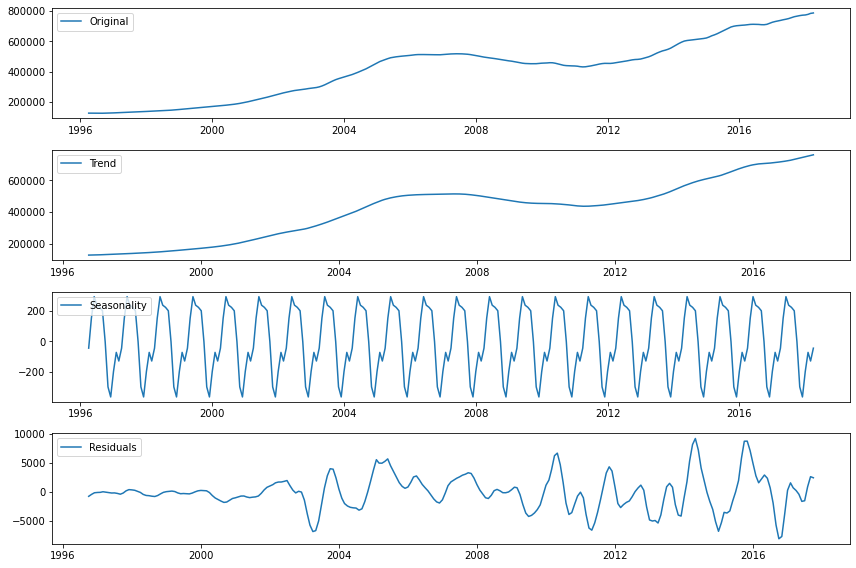

In [35]:
# Plot gathered statistics
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(melted_df['Washington, DC'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()

In [36]:
# Drop NaN values from residuals.

house_ts_decompose = residual 
house_ts_decompose.dropna(inplace = True)

In [37]:
#After we take out the trend and the seasonality, we look at our residual
#with no null values.
dftest = adfuller(house_ts_decompose)

#Print out our results. 
display_df(dftest)

Test Statistic                  -4.719574
p-value                          0.000077
#Lags Used                      10.000000
Number of Observations Used    242.000000
Critical Value (1%)             -3.457664
Critical Value (5%)             -2.873559
Critical Value (10%)            -2.573175
dtype: float64

We got a stationary time series but we see that there are some trends in there still. We know that because our residuals is heteroskedastic.

We are going to make a function that takes in all of our selected cities and make a time series model for all of the cities

In [38]:
#def decompose_ts(city):
  #  decomposition = seasonal_decompose(melted_df[city])
  #  trend = decomposition.trend
  #  seasonal = decomposition.seasonal
   # residual = decomposition.resid
    

### Baseline Model

Function to build baseline model

In [39]:
class baseline_mod:
    
    def __init__(self,city='Washington, DC'):
        self.city = city
    
    def plot_shift(self,df):
        ax = df[self.city].plot(figsize=(15,10))
        df[self.city].shift(1).plot()
        df[self.city].shift(2).plot()
        ax.legend(['Original', 'shift 1', 'shift 2'])
        plt.show()
        
        
    def shift_df(self, df):
        self.shifted_df = pd.DataFrame(np.hstack((df[self.city].values.reshape(-1, 1),
                                                  df[self.city].shift().values.reshape(-1, 1),
                                                  df[self.city].shift(periods=2).values.reshape(-1, 1))),
                                       columns=['orig', 'shifted_one_period', 'shifted_two_periods'],
                                       index=df.index)
        self.rmse_shift1_ = mean_squared_error(self.shifted_df['orig'][1:], self.shifted_df['shifted_one_period'][1:], squared=False)
        self.rmse_shift2_ = mean_squared_error(self.shifted_df['orig'][2:], self.shifted_df['shifted_two_periods'][2:], squared=False)
        return self.shifted_df

        

Look at plot of shifted time series for Washington, DC

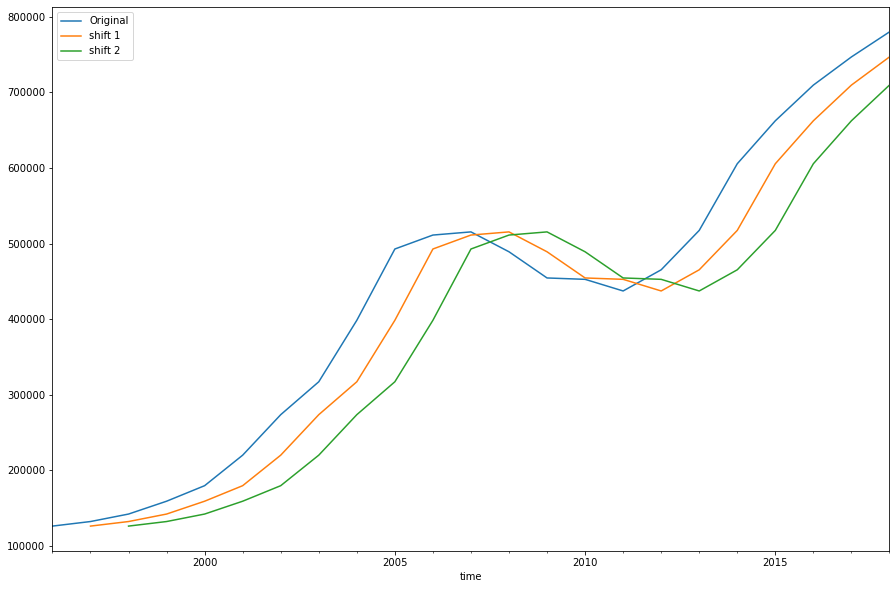

In [40]:
baseline_year = baseline_mod()
baseline_year.plot_shift(resampled_year)

Build dataframe of shifted values in Washington, DC.

In [41]:
baseline_year.shift_df(resampled_year)

orig  shifted_one_period  shifted_two_periods
time                                                         
1996-12-31  126250.0                 NaN                  NaN
1997-12-31  132275.0            126250.0                  NaN
1998-12-31  142175.0            132275.0             126250.0
1999-12-31  159150.0            142175.0             132275.0
2000-12-31  179700.0            159150.0             142175.0
2001-12-31  220050.0            179700.0             159150.0
2002-12-31  273600.0            220050.0             179700.0
2003-12-31  317125.0            273600.0             220050.0
2004-12-31  398425.0            317125.0             273600.0
2005-12-31  492725.0            398425.0             317125.0
2006-12-31  511175.0            492725.0             398425.0
2007-12-31  515350.0            511175.0             492725.0
2008-12-31  489050.0            515350.0             511175.0
2009-12-31  454425.0            489050.0             515350.0
2010-12-31  452600.0            454425.0             489050.0
2011-12-31  437225.0            452600.0             454425.0
2012-12-31  465225.0            437225.0             452600.0
2013-12-31  517325.0            465225.0             437225.0
2014-12-31  605500.0            517325.0             465225.0
2015-12-31  662300.0            605500.0             517325.0
2016-12-31  709500.0            662300.0             605500.0
2017-12-31  746750.0            709500.0             662300.0
2018-12-31  779850.0            746750.0             709500.0

In [42]:
print(baseline_year.rmse_shift1_)
print(baseline_year.rmse_shift2_)

44942.247030848586
87278.32651788132


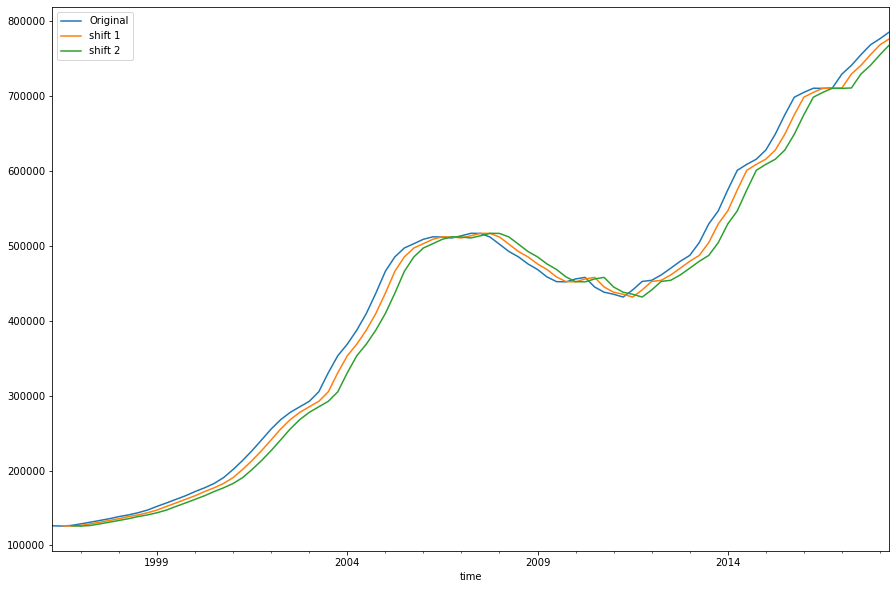

In [43]:
baseline_quarterly = baseline_mod()
baseline_quarterly.plot_shift(resampled_quarter)

In [44]:
baseline_quarterly.shift_df(resampled_quarter)

orig  shifted_one_period  shifted_two_periods
time                                                         
1996-06-30  126250.0                 NaN                  NaN
1996-09-30  125800.0            126250.0                  NaN
1996-12-31  126650.0            125800.0             126250.0
1997-03-31  128800.0            126650.0             125800.0
1997-06-30  131050.0            128800.0             126650.0
1997-09-30  133350.0            131050.0             128800.0
1997-12-31  135700.0            133350.0             131050.0
1998-03-31  138500.0            135700.0             133350.0
1998-06-30  140750.0            138500.0             135700.0
1998-09-30  143650.0            140750.0             138500.0
1998-12-31  147250.0            143650.0             140750.0
1999-03-31  152150.0            147250.0             143650.0
1999-06-30  156750.0            152150.0             147250.0
1999-09-30  161550.0            156750.0             152150.0
1999-12-31  166350.0            161550.0             156750.0
2000-03-31  171950.0            166350.0             161550.0
2000-06-30  176950.0            171950.0             166350.0
2000-09-30  182750.0            176950.0             171950.0
2000-12-31  190600.0            182750.0             176950.0
2001-03-31  201500.0            190600.0             182750.0
2001-06-30  213550.0            201500.0             190600.0
2001-09-30  226750.0            213550.0             201500.0
2001-12-31  241050.0            226750.0             213550.0
2002-03-31  255500.0            241050.0             226750.0
2002-06-30  268000.0            255500.0             241050.0
2002-09-30  277650.0            268000.0             255500.0
2002-12-31  285100.0            277650.0             268000.0
2003-03-31  292400.0            285100.0             277650.0
2003-06-30  305150.0            292400.0             285100.0
2003-09-30  330550.0            305150.0             292400.0
2003-12-31  353300.0            330550.0             305150.0
2004-03-31  368800.0            353300.0             330550.0
2004-06-30  387500.0            368800.0             353300.0
2004-09-30  409700.0            387500.0             368800.0
2004-12-31  436800.0            409700.0             387500.0
2005-03-31  466050.0            436800.0             409700.0
2005-06-30  485350.0            466050.0             436800.0
2005-09-30  497200.0            485350.0             466050.0
2005-12-31  502950.0            497200.0             485350.0
2006-03-31  508850.0            502950.0             497200.0
2006-06-30  512100.0            508850.0             502950.0
2006-09-30  511800.0            512100.0             508850.0
2006-12-31  510600.0            511800.0             512100.0
2007-03-31  513500.0            510600.0             511800.0
2007-06-30  516800.0            513500.0             510600.0
2007-09-30  516650.0            516800.0             513500.0
2007-12-31  511850.0            516650.0             516800.0
2008-03-31  502200.0            511850.0             516650.0
2008-06-30  492450.0            502200.0             511850.0
2008-09-30  485300.0            492450.0             502200.0
2008-12-31  475850.0            485300.0             492450.0
2009-03-31  468450.0            475850.0             485300.0
2009-06-30  458500.0            468450.0             475850.0
2009-09-30  452250.0            458500.0             468450.0
2009-12-31  451950.0            452250.0             458500.0
2010-03-31  455850.0            451950.0             452250.0
2010-06-30  457950.0            455850.0             451950.0
2010-09-30  445100.0            457950.0             455850.0
2010-12-31  438150.0            445100.0             457950.0
2011-03-31  435400.0            438150.0             445100.0
2011-06-30  431650.0            435400.0             438150.0
2011-09-30  441150.0            431650.0             435400.0
2011-12-31  452500.0            441150.0        

In [45]:
print(baseline_quarterly.rmse_shift1_)
print(baseline_quarterly.rmse_shift2_)

12208.992122053467
23845.184940100302


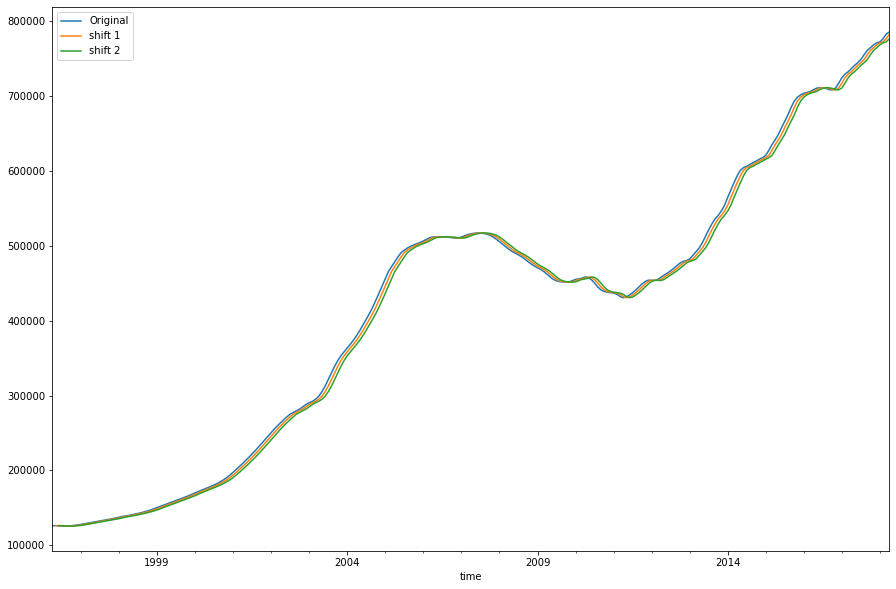

In [46]:
baseline_monthly = baseline_mod()
baseline_monthly.plot_shift(melted_df)

In [47]:
baseline_monthly.shift_df(melted_df)

orig  shifted_one_period  shifted_two_periods
time                                                         
1996-04-01  126500.0                 NaN                  NaN
1996-05-01  126250.0            126500.0                  NaN
1996-06-01  126000.0            126250.0             126500.0
1996-07-01  125800.0            126000.0             126250.0
1996-08-01  125750.0            125800.0             126000.0
1996-09-01  125900.0            125750.0             125800.0
1996-10-01  126250.0            125900.0             125750.0
1996-11-01  126650.0            126250.0             125900.0
1996-12-01  127300.0            126650.0             126250.0
1997-01-01  128050.0            127300.0             126650.0
1997-02-01  128800.0            128050.0             127300.0
1997-03-01  129500.0            128800.0             128050.0
1997-04-01  130200.0            129500.0             128800.0
1997-05-01  131050.0            130200.0             129500.0
1997-06-01  131900.0            131050.0             130200.0
1997-07-01  132650.0            131900.0             131050.0
1997-08-01  133350.0            132650.0             131900.0
1997-09-01  134000.0            133350.0             132650.0
1997-10-01  134800.0            134000.0             133350.0
1997-11-01  135700.0            134800.0             134000.0
1997-12-01  136650.0            135700.0             134800.0
1998-01-01  137600.0            136650.0             135700.0
1998-02-01  138500.0            137600.0             136650.0
1998-03-01  139150.0            138500.0             137600.0
1998-04-01  139950.0            139150.0             138500.0
1998-05-01  140750.0            139950.0             139150.0
1998-06-01  141700.0            140750.0             139950.0
1998-07-01  142650.0            141700.0             140750.0
1998-08-01  143650.0            142650.0             141700.0
1998-09-01  144750.0            143650.0             142650.0
1998-10-01  145950.0            144750.0             143650.0
1998-11-01  147250.0            145950.0             144750.0
1998-12-01  148800.0            147250.0             145950.0
1999-01-01  150500.0            148800.0             147250.0
1999-02-01  152150.0            150500.0             148800.0
1999-03-01  153650.0            152150.0             150500.0
1999-04-01  155200.0            153650.0             152150.0
1999-05-01  156750.0            155200.0             153650.0
1999-06-01  158350.0            156750.0             155200.0
1999-07-01  159950.0            158350.0             156750.0
1999-08-01  161550.0            159950.0             158350.0
1999-09-01  163150.0            161550.0             159950.0
1999-10-01  164750.0            163150.0             161550.0
1999-11-01  166350.0            164750.0             163150.0
1999-12-01  168150.0            166350.0             164750.0
2000-01-01  170100.0            168150.0             166350.0
2000-02-01  171950.0            170100.0             168150.0
2000-03-01  173650.0            171950.0             170100.0
2000-04-01  175300.0            173650.0             171950.0
2000-05-01  176950.0            175300.0             173650.0
2000-06-01  178750.0            176950.0             175300.0
2000-07-01  180650.0            178750.0             176950.0
2000-08-01  182750.0            180650.0             178750.0
2000-09-01  185050.0            182750.0             180650.0
2000-10-01  187650.0            185050.0             182750.0
2000-11-01  190600.0            187650.0             185050.0
2000-12-01  194000.0            190600.0             187650.0
2001-01-01  197650.0            194000.0             190600.0
2001-02-01  201500.0            197650.0             194000.0
2001-03-01  205350.0            201500.0             197650.0
2001-04-01  209400.0            205350.0             201500.0
2001-05-01  213550.0            209400.0             205350.0
2001-06-01  217850.0            213550.0        

In [48]:
print(baseline_monthly.rmse_shift1_)
print(baseline_monthly.rmse_shift2_)

4139.46156467898
8226.567713804458


### ARIMA model

In [49]:
def add_freq(idx, freq=None):
    """Add a frequency attribute to idx, through inference or directly.

    Returns a copy.  If `freq` is None, it is inferred.
    """

    idx = idx.copy()
    if freq is None:
        if idx.freq is None:
            freq = pd.infer_freq(idx)
        else:
            return idx
    idx.freq = pd.tseries.frequencies.to_offset(freq)
    if idx.freq is None:
        raise AttributeError('no discernible frequency found to `idx`.  Specify'
                             ' a frequency string with `freq`.')
    return idx

In [50]:
#We are adding frequency attribute to our dataframe index. 
melted_df.index = add_freq(melted_df.index)
#Check the length of our dataframe. 
melted_df.shape

(265, 10)

In [51]:
melted_df

Washington, DC  New York, NY  San Francisco, CA  Seattle, WA  \
time                                                                       
1996-04-01        126500.0      175950.0           306900.0     170600.0   
1996-05-01        126250.0      175650.0           307600.0     171000.0   
1996-06-01        126000.0      175800.0           308400.0     171600.0   
1996-07-01        125800.0      175150.0           309300.0     172200.0   
1996-08-01        125750.0      174400.0           310500.0     173000.0   
1996-09-01        125900.0      174000.0           312000.0     173800.0   
1996-10-01        126250.0      174050.0           313700.0     174800.0   
1996-11-01        126650.0      173850.0           315600.0     176000.0   
1996-12-01        127300.0      174000.0           318100.0     177400.0   
1997-01-01        128050.0      174150.0           321000.0     179000.0   
1997-02-01        128800.0      174200.0           323900.0     180600.0   
1997-03-01        129500.0      174500.0           326600.0     182000.0   
1997-04-01        130200.0      174950.0           329600.0     183600.0   
1997-05-01        131050.0      175550.0           332600.0     185100.0   
1997-06-01        131900.0      176400.0           335800.0     186700.0   
1997-07-01        132650.0      177100.0           339200.0     188300.0   
1997-08-01        133350.0      177900.0           342700.0     190000.0   
1997-09-01        134000.0      178800.0           346400.0     192800.0   
1997-10-01        134800.0      179800.0           350400.0     196000.0   
1997-11-01        135700.0      181000.0           354500.0     199400.0   
1997-12-01        136650.0      181850.0           359100.0     203100.0   
1998-01-01        137600.0      182850.0           364200.0     206900.0   
1998-02-01        138500.0      183700.0           369300.0     210600.0   
1998-03-01        139150.0      184350.0           374100.0     214100.0   
1998-04-01        139950.0      185050.0           379100.0     217600.0   
1998-05-01        140750.0      185650.0           384000.0     221000.0   
1998-06-01        141700.0      186350.0           388900.0     224300.0   
1998-07-01        142650.0      187100.0           393700.0     227500.0   
1998-08-01        143650.0      187950.0           398300.0     230700.0   
1998-09-01        144750.0      189400.0           402600.0     233800.0   
1998-10-01        145950.0      190500.0           406800.0     236900.0   
1998-11-01        147250.0      191950.0           410900.0     240000.0   
1998-12-01        148800.0      193650.0           415400.0     243100.0   
1999-01-01        150500.0      195350.0           420200.0     246300.0   
1999-02-01        152150.0      196950.0           425100.0     249200.0   
1999-03-01        153650.0      198450.0           430000.0     251900.0   
1999-04-01        155200.0      200000.0           435400.0     254500.0   
1999-05-01        156750.0      202000.0           441300.0     257100.0   
1999-06-01        158350.0      204250.0           447900.0     259700.0   
1999-07-01        159950.0      206500.0           455500.0     262300.0   
1999-08-01        161550.0      208850.0           463900.0     265000.0   
1999-09-01        163150.0      211200.0           473100.0     267300.0   
1999-10-01        164750.0      213650.0           483300.0     269600.0   
1999-11-01        166350.0      216150.0           494300.0     272200.0   
1999-12-01        168150.0      218900.0           506200.0     274900.0   
2000-01-01        170100.0      221800.0           518700.0     277700.0   
2000-02-01        171950.0      224700.0           530800.0     280500.0   
2000-03-01        173650.0      227550.0           542100.0     283100.0   
2000-04-01        175300.0      229750.0           552700.0     285600.0   
2000-05-01        176950.0      232650.0           562300.0     288000.0   
2000-06-01        178750.0      235600.0           570800.0 

We'll be splitting our data into our train-test split. 
We are making the first 80% of our data into the training set and the last 20% of our dataset into our test set.

In [52]:
train = melted_df.iloc[:212]
test = melted_df.iloc[212:]

In [53]:
# #Here, we are splitting the training set into cross-validations score. 
# split = TimeSeriesSplit()
# for train_ind, val_ind in split.split(train):
    
# #     print(f'Train index: {train_ind}')
# #     print(f'Test  index: {val_ind}')

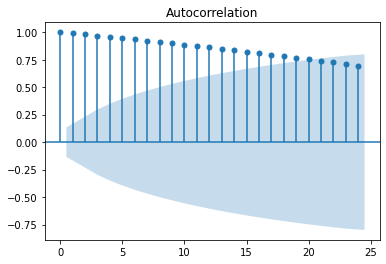

In [54]:
#Plotting the acf for Washington DC just for visualization. 
plot_acf(train['Washington, DC'].dropna());

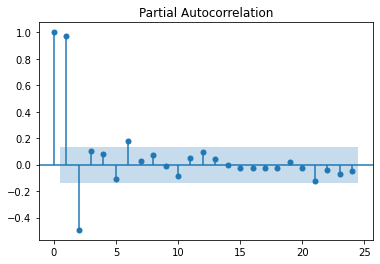

In [55]:
#Plotted our PACF for Washington DC.
#Diff is plotting the particial autocorrelation of the graph.
plot_pacf(train['Washington, DC'].diff().dropna());

In [56]:
class arima_mod: 
    
    def __init__(self, city = 'Washington, DC'):
        self.city = city 

        
    def model(self, df_train, df_test,p,d,q):
        #Fitting our model using ARIMA and instantiating it
        self.model_fit = ARIMA(df_train[self.city], order = [p,d,q]).fit()
        #Creating our prediction 
        self.y_hat_test_ = self.model_fit.predict(start=df_test[self.city].index[0], 
                                                  end=df_test[self.city].index[-1],typ='levels')
        self.model_summary_ = self.model_fit.summary()
        self.rmse_ = mean_squared_error(df_test[self.city],
                                        self.y_hat_test_,
                                        squared=False)
        print(self.model_summary_)
        print('-'*23)
        print('-'*23)
        print(f'RMSE: {self.rmse_}')
    
    def plot(self, df_test):
        fig, ax = plt.subplots(figsize = (12,8)) 
        ax.plot(df_test[self.city])
        ax.plot(self.y_hat_test_)
        ax.legend(['Original', 'Predicted'])
        ax.set_title(f'Original vs Predicted home values for {self.city}')

                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -2021.754
Date:                Wed, 11 May 2022   AIC                           4055.508
Time:                        11:18:10   BIC                           4075.619
Sample:                    04-01-1996   HQIC                          4063.638
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.1170      0.029     73.539      0.000       2.061       2.173
ar.L2         -1.2468      0.038    -32.470      0.000      -1.322      -1.172
ar.L3          0.1291      0.011     11.369      0.0

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -2066.652
Date:                Wed, 11 May 2022   AIC                           4145.303
Time:                        11:18:11   BIC                           4165.415
Sample:                    04-01-1996   HQIC                          4153.433
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6927      3.954      0.428      0.669      -6.056       9.442
ar.L2         -0.7234      3.926     -0.184      0.854      -8.419       6.972
ar.L3          0.0204      0.105      0.194      0.8

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:      San Francisco, CA   No. Observations:                  212
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -2510.331
Date:                Wed, 11 May 2022   AIC                           5032.662
Time:                        11:18:12   BIC                           5052.773
Sample:                    04-01-1996   HQIC                          5040.791
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9531      0.015    128.183      0.000       1.923       1.983
ar.L2         -0.9938      0.018    -56.698      0.000      -1.028      -0.959
ar.L3          0.0405      0.003     14.328      0.0

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  212
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -2059.686
Date:                Wed, 11 May 2022   AIC                           4131.372
Time:                        11:18:14   BIC                           4151.483
Sample:                    04-01-1996   HQIC                          4139.501
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9826      0.087     22.872      0.000       1.813       2.152
ar.L2         -1.0060      0.083    -12.101      0.000      -1.169      -0.843
ar.L3          0.0234      0.010      2.336      0.0

                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  212
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -2030.414
Date:                Wed, 11 May 2022   AIC                           4072.828
Time:                        11:18:19   BIC                           4092.939
Sample:                    04-01-1996   HQIC                          4080.957
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9924      0.191     10.454      0.000       1.619       2.366
ar.L2         -1.0399      0.193     -5.378      0.000      -1.419      -0.661
ar.L3          0.0467      0.008      5.638      0.0

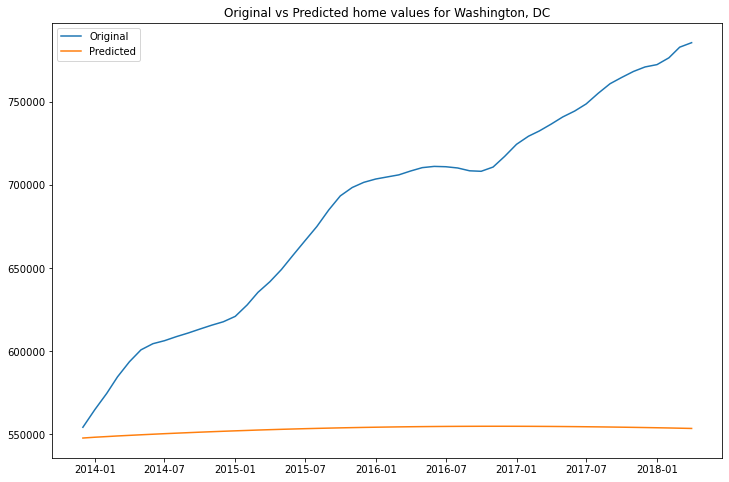

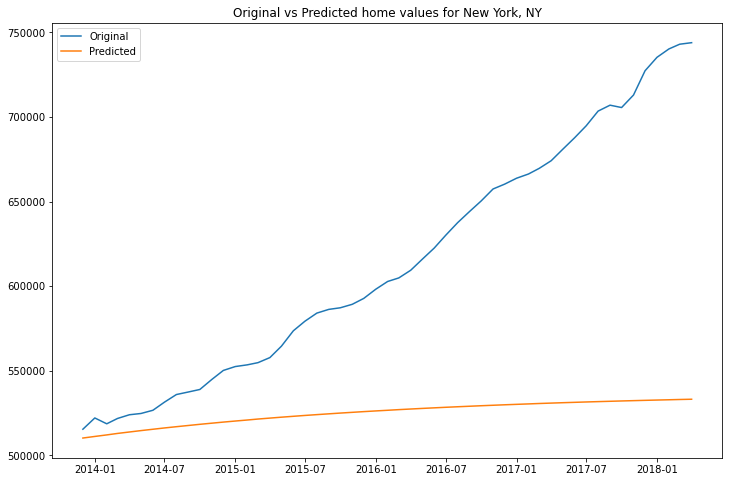

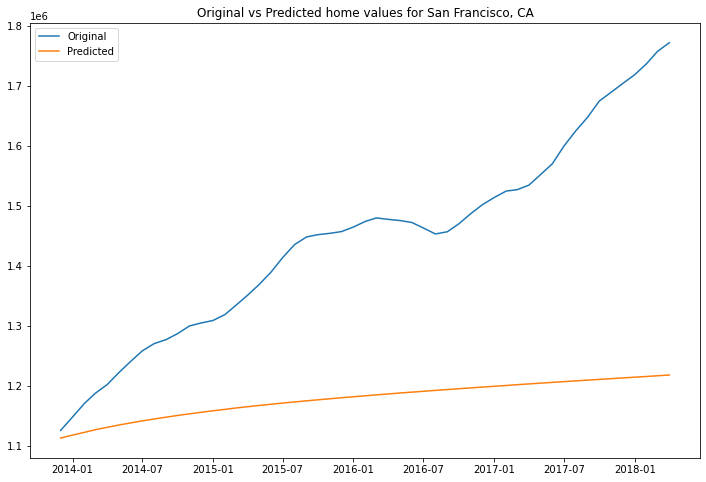

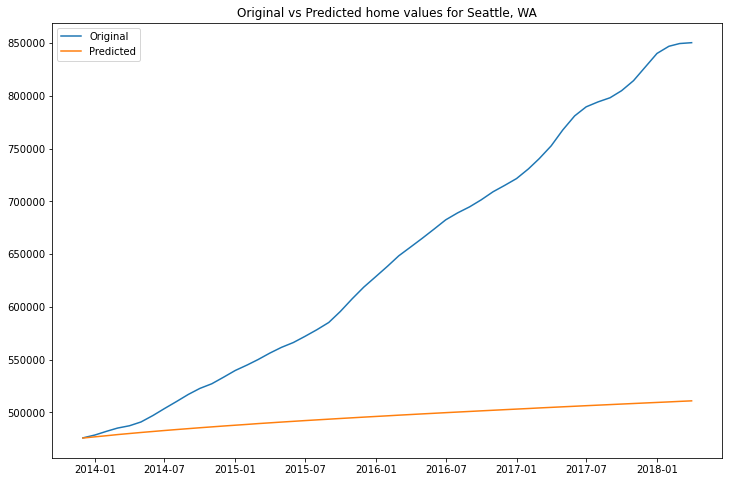

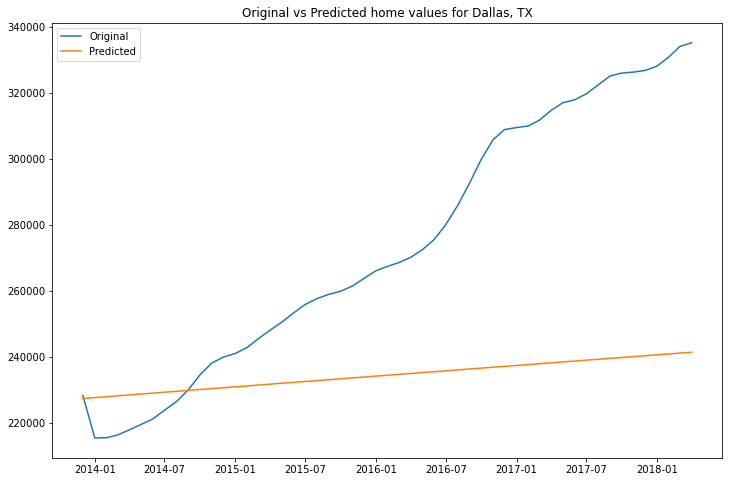

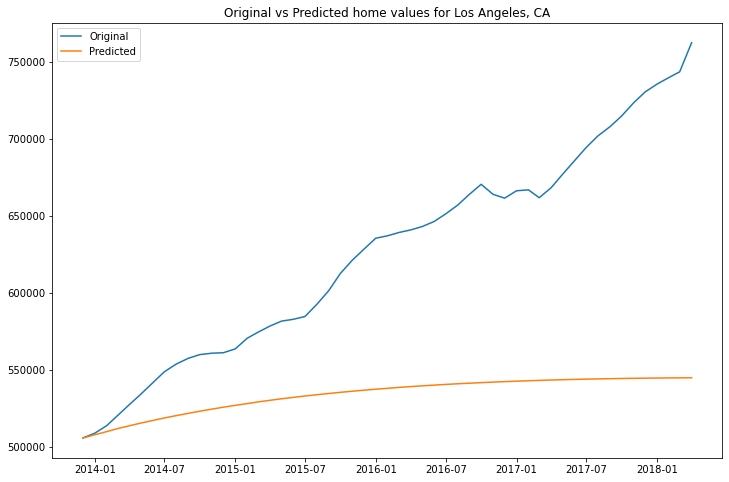

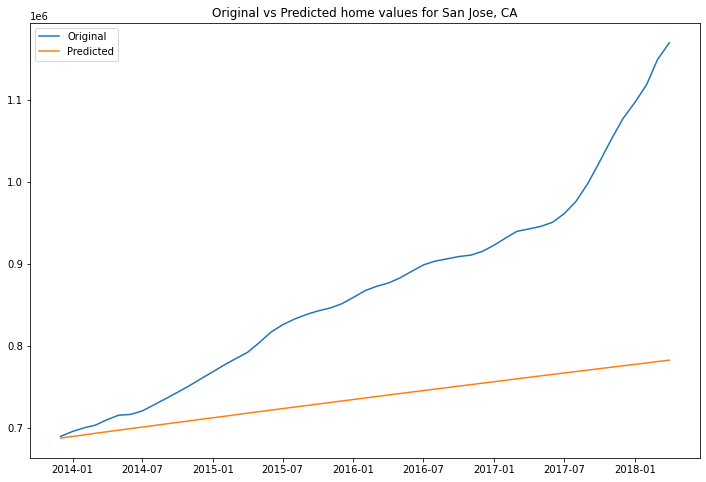

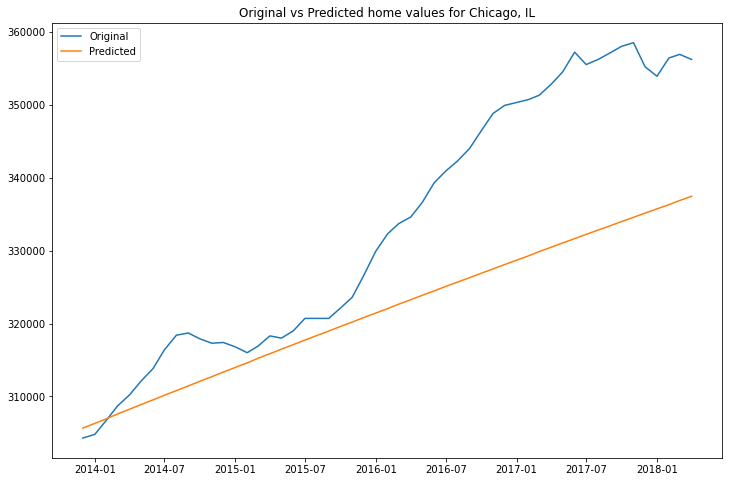

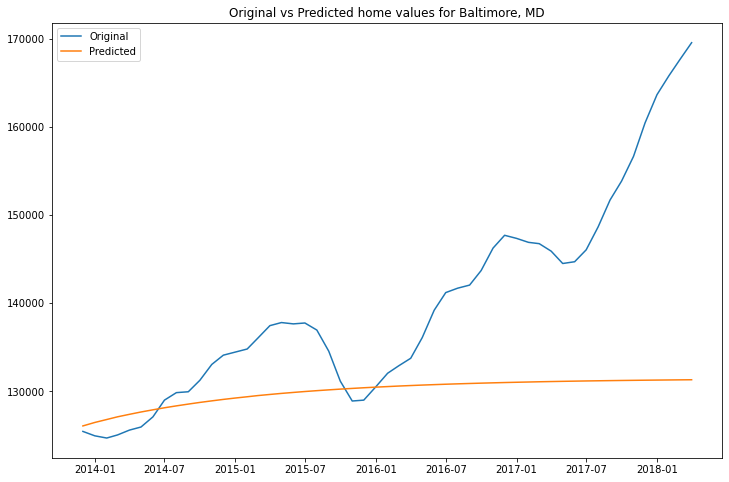

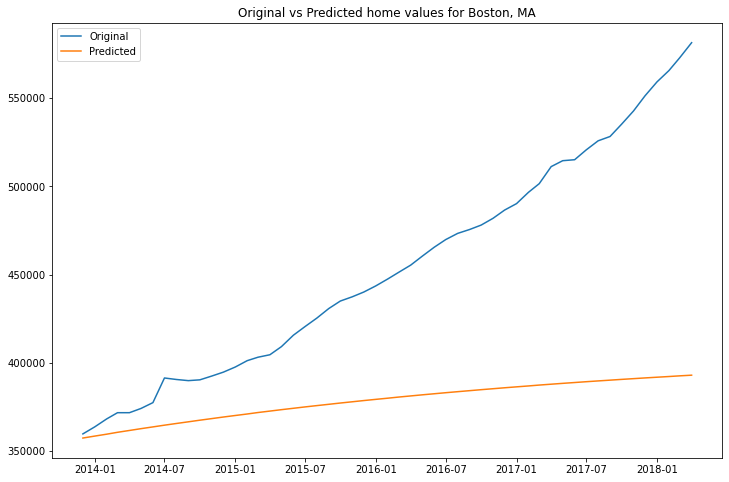

In [57]:
#Not using this model.
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 3,1,2)
    city_model.plot(test)

                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1693.020
Date:                Wed, 11 May 2022   AIC                           3396.041
Time:                        11:18:21   BIC                           3412.777
Sample:                    04-01-1996   HQIC                          3402.807
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3337      0.494      2.701      0.007       0.366       2.301
ar.L2         -0.3489      0.485     -0.719      0.472      -1.300       0.602
ma.L1         -1.2857      0.488     -2.633      0.0

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1965.509
Date:                Wed, 11 May 2022   AIC                           3941.018
Time:                        11:18:21   BIC                           3957.753
Sample:                    04-01-1996   HQIC                          3947.783
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0611      2.709      0.023      0.982      -5.248       5.370
ar.L2          0.6842      2.338      0.293      0.770      -3.899       5.267
ma.L1         -0.1859      2.706     -0.069      0.9

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  212
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1924.040
Date:                Wed, 11 May 2022   AIC                           3858.080
Time:                        11:18:24   BIC                           3874.815
Sample:                    04-01-1996   HQIC                          3864.845
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0745      6.315      0.012      0.991     -12.302      12.452
ar.L2          0.6592      5.288      0.125      0.901      -9.705      11.023
ma.L1         -0.1355      6.314     -0.021      0.9

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  212
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1753.249
Date:                Wed, 11 May 2022   AIC                           3516.498
Time:                        11:18:26   BIC                           3533.234
Sample:                    04-01-1996   HQIC                          3523.264
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5498      0.119     13.035      0.000       1.317       1.783
ar.L2         -0.8602      0.125     -6.900      0.000      -1.105      -0.616
ma.L1         -1.5396      0.130    -11.876      0.0

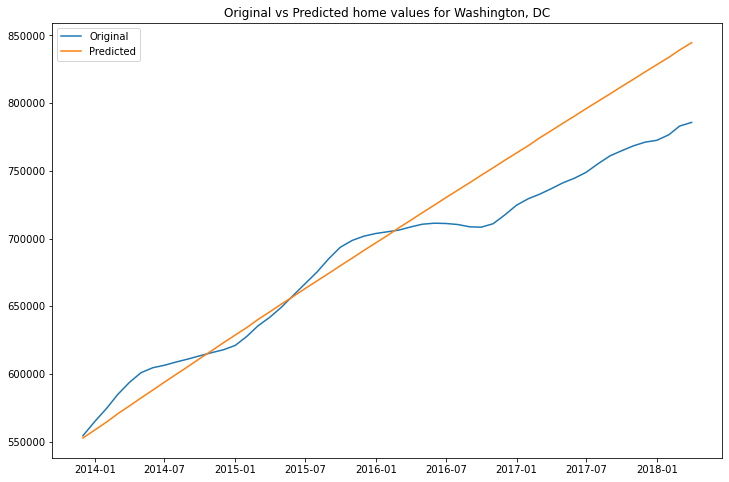

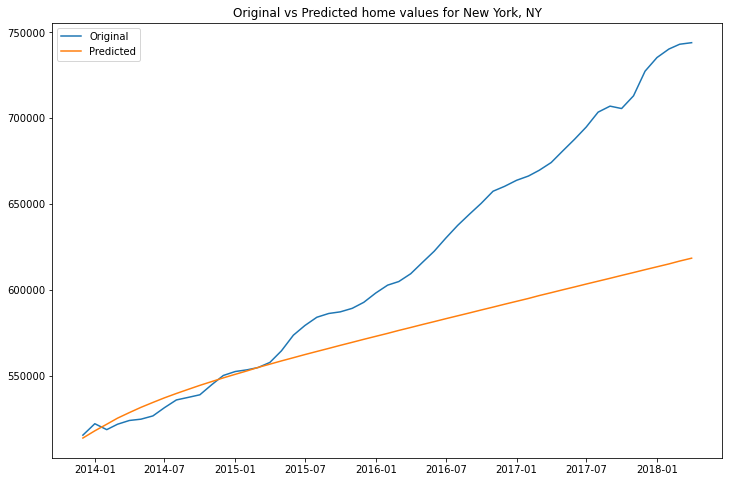

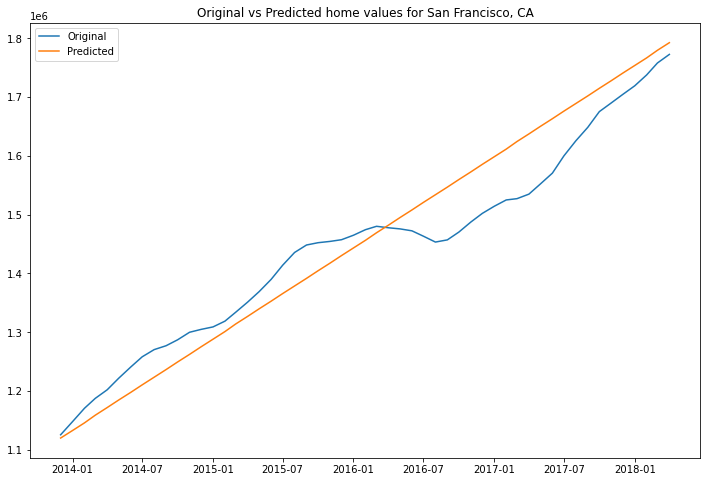

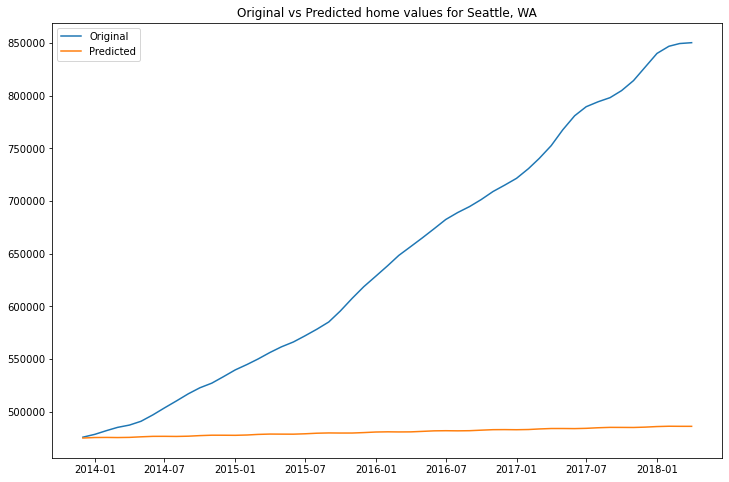

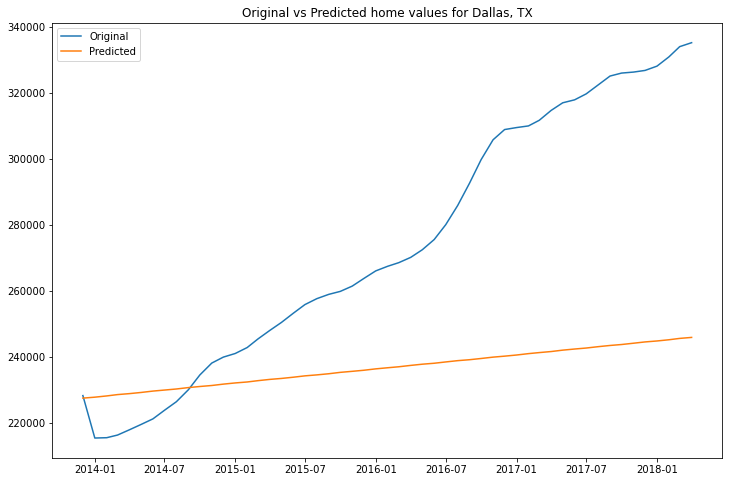

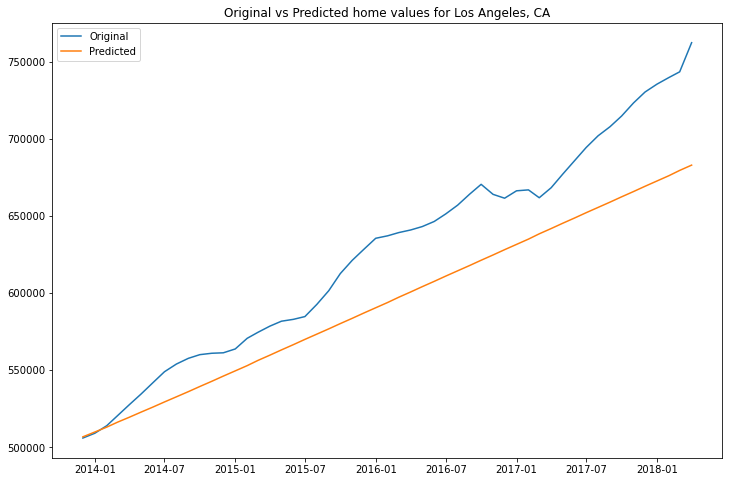

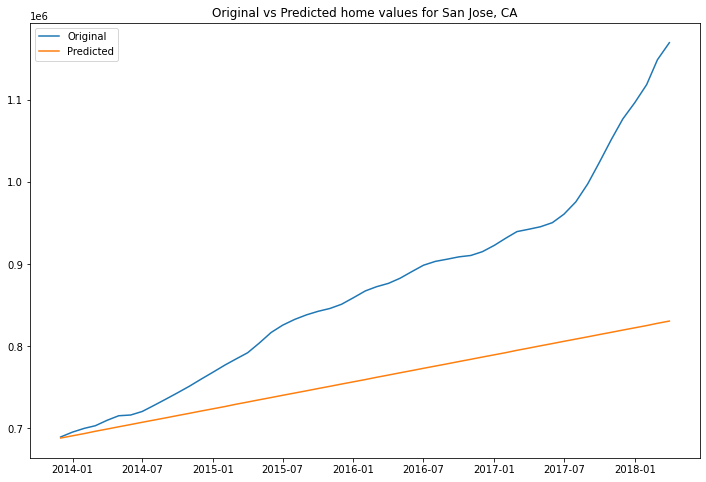

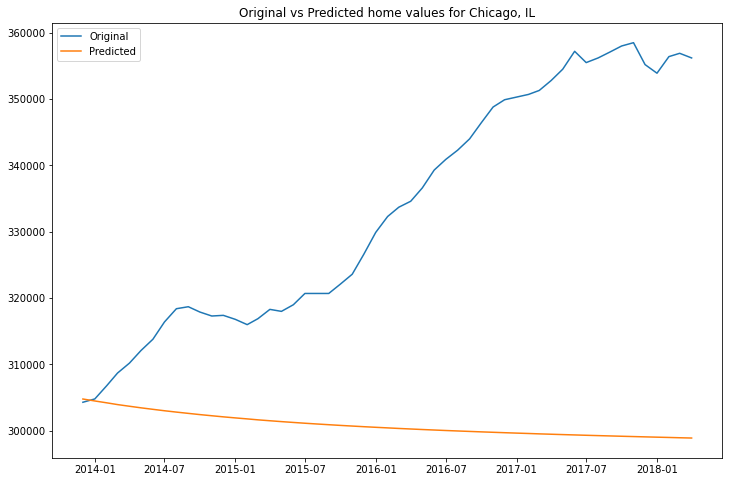

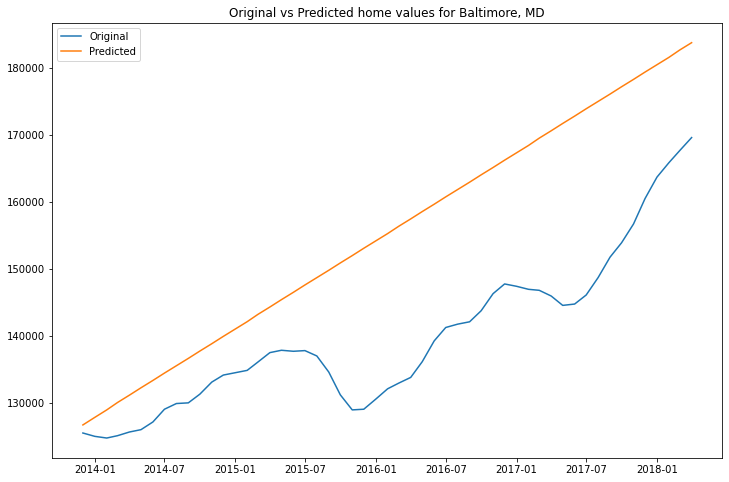

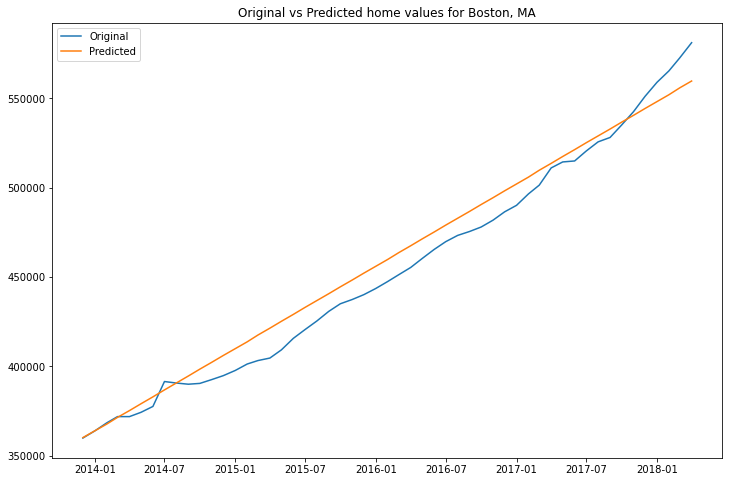

In [58]:
#4 graphs are good.
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 2, 2, 2)
    city_model.plot(test)

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1695.002
Date:                Wed, 11 May 2022   AIC                           3402.004
Time:                        11:27:51   BIC                           3422.087
Sample:                    04-01-1996   HQIC                          3410.123
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2253     19.919      0.062      0.951     -37.815      40.266
ar.L2         -0.3611     17.193     -0.021      0.983     -34.058      33.336
ar.L3          0.0241      1.277      0.019      0.9

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1965.111
Date:                Wed, 11 May 2022   AIC                           3942.222
Time:                        11:27:51   BIC                           3962.305
Sample:                    04-01-1996   HQIC                          3950.341
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1309      1.242      0.105      0.916      -2.304       2.566
ar.L2          0.6099      1.065      0.573      0.567      -1.477       2.697
ar.L3         -0.0191      0.041     -0.461      0.6

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:      San Francisco, CA   No. Observations:                  212
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1976.942
Date:                Wed, 11 May 2022   AIC                           3965.883
Time:                        11:27:52   BIC                           3985.966
Sample:                    04-01-1996   HQIC                          3974.002
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1244      3.027      0.041      0.967      -5.808       6.057
ar.L2          0.7964      2.913      0.273      0.785      -4.913       6.505
ar.L3         -0.0151      0.040     -0.380      0.7

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  212
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1923.997
Date:                Wed, 11 May 2022   AIC                           3859.993
Time:                        11:27:55   BIC                           3880.076
Sample:                    04-01-1996   HQIC                          3868.112
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1328      3.539      0.038      0.970      -6.804       7.070
ar.L2          0.5597      3.003      0.186      0.852      -5.327       6.446
ar.L3         -0.0064      0.026     -0.243      0.8

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           San Jose, CA   No. Observations:                  212
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1874.546
Date:                Wed, 11 May 2022   AIC                           3761.092
Time:                        11:27:56   BIC                           3781.175
Sample:                    04-01-1996   HQIC                          3769.211
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3408      4.717      0.072      0.942      -8.904       9.585
ar.L2          0.5887      4.536      0.130      0.897      -8.301       9.479
ar.L3         -0.0002      0.045     -0.004      0.9

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:            Chicago, IL   No. Observations:                  212
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1723.660
Date:                Wed, 11 May 2022   AIC                           3459.320
Time:                        11:27:57   BIC                           3479.403
Sample:                    04-01-1996   HQIC                          3467.439
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1484      1.297      0.114      0.909      -2.393       2.690
ar.L2          0.7660      1.284      0.597      0.551      -1.751       3.283
ar.L3         -0.0250      0.025     -0.993      0.3

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:          Baltimore, MD   No. Observations:                  212
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1611.013
Date:                Wed, 11 May 2022   AIC                           3234.027
Time:                        11:27:58   BIC                           3254.110
Sample:                    04-01-1996   HQIC                          3242.146
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4017      1.093      0.367      0.713      -1.741       2.545
ar.L2          0.0896      0.498      0.180      0.857      -0.887       1.066
ar.L3          0.0163      0.168      0.097      0.9

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  212
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1753.144
Date:                Wed, 11 May 2022   AIC                           3518.288
Time:                        11:27:59   BIC                           3538.371
Sample:                    04-01-1996   HQIC                          3526.407
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4515      0.454      3.196      0.001       0.561       2.342
ar.L2         -0.6959      0.380     -1.834      0.067      -1.440       0.048
ar.L3          0.0037      0.046      0.081      0.9

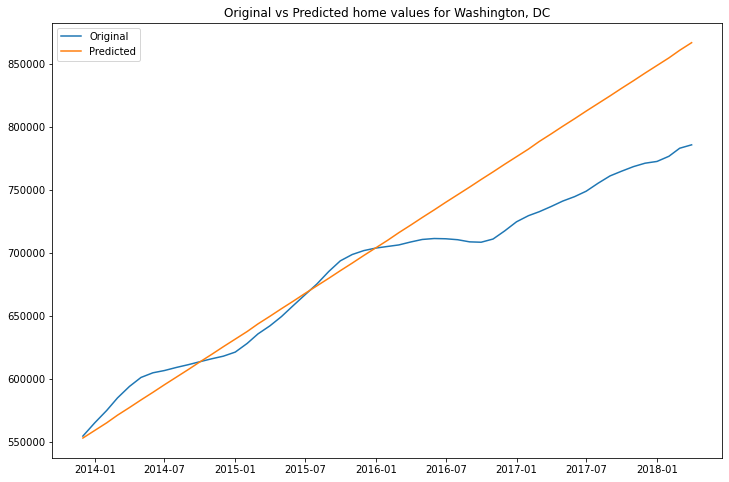

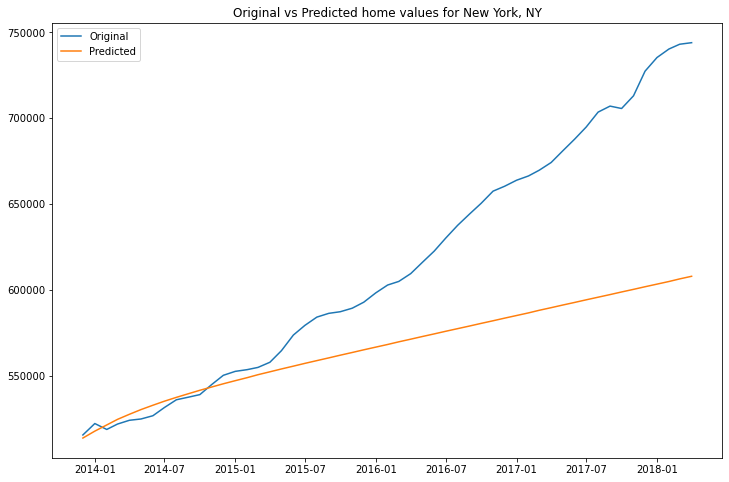

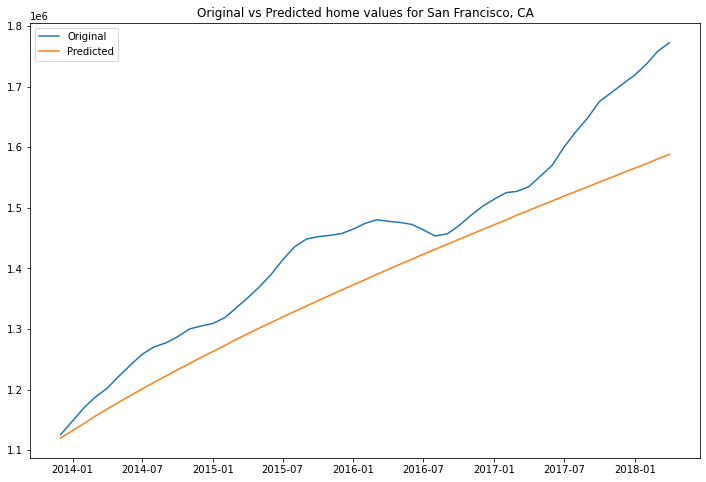

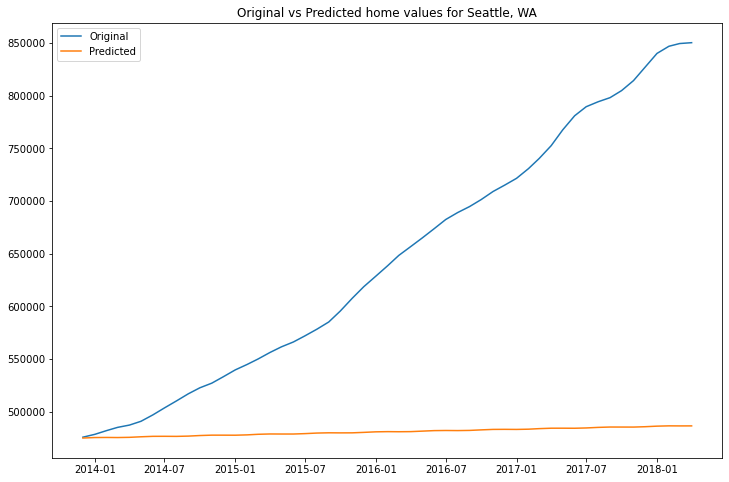

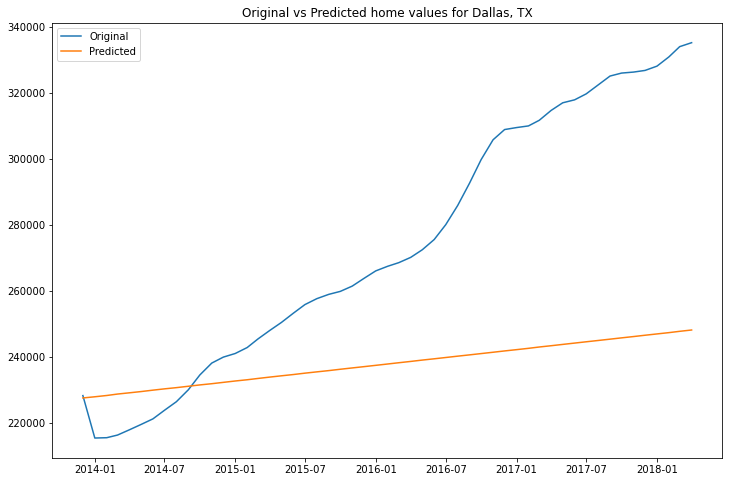

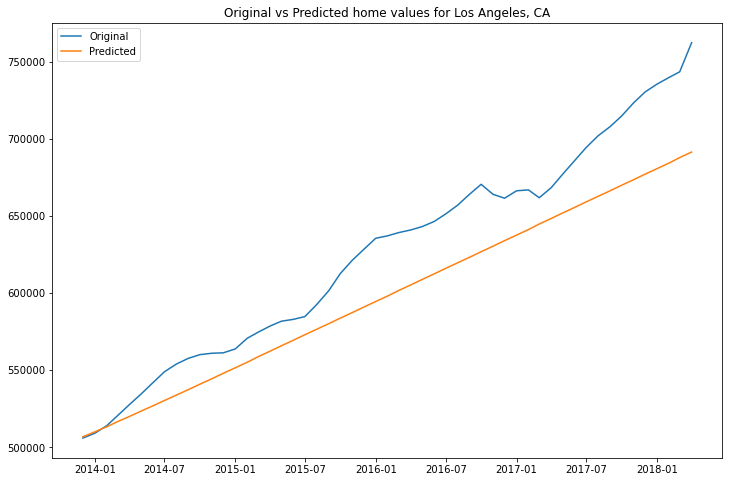

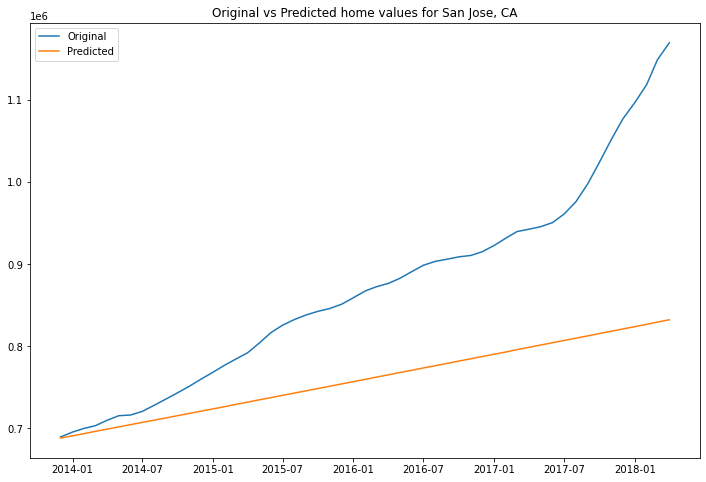

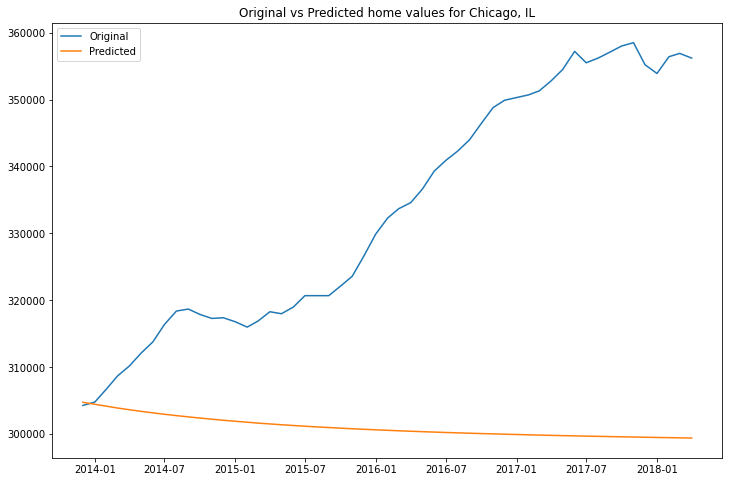

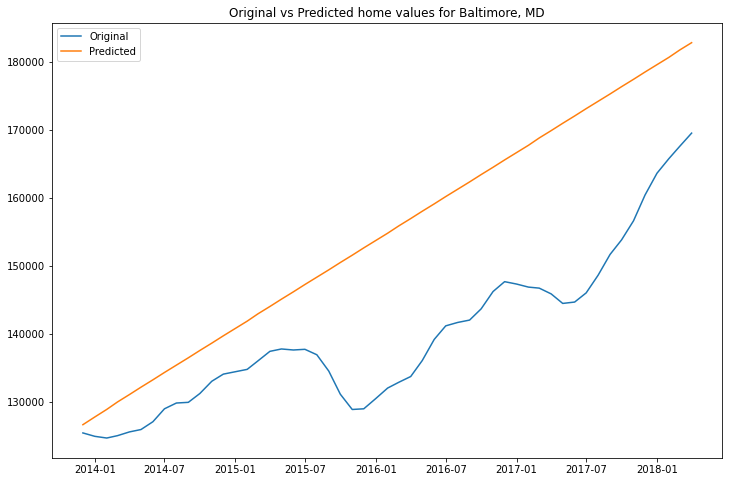

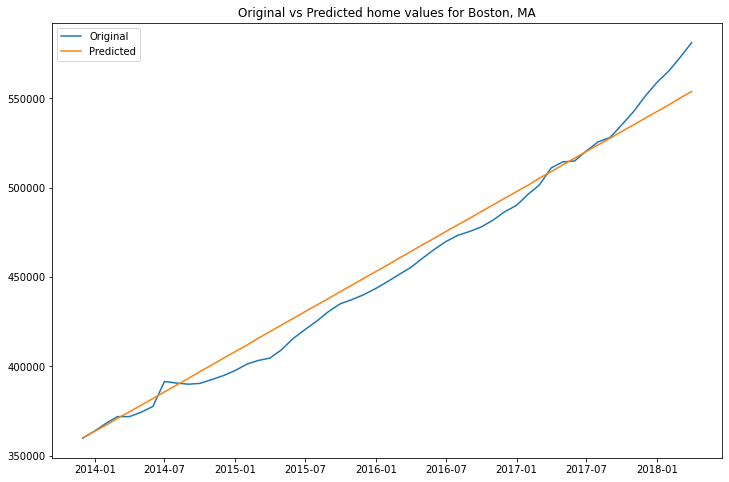

In [64]:
#4 but with an edge. Best Model
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 3,2,2)
    city_model.plot(test)

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(3, 3, 2)   Log Likelihood               -1672.628
Date:                Wed, 11 May 2022   AIC                           3357.256
Time:                        11:28:37   BIC                           3377.310
Sample:                    04-01-1996   HQIC                          3365.364
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1629      0.455      0.358      0.721      -0.730       1.056
ar.L2          0.4349      0.360      1.207      0.228      -0.271       1.141
ar.L3         -0.0721      0.029     -2.529      0.0

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(3, 3, 2)   Log Likelihood               -1962.052
Date:                Wed, 11 May 2022   AIC                           3936.105
Time:                        11:28:38   BIC                           3956.159
Sample:                    04-01-1996   HQIC                          3944.213
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7511      0.149      5.030      0.000       0.458       1.044
ar.L2         -0.0048      0.068     -0.071      0.944      -0.138       0.129
ar.L3         -0.0246      0.032     -0.773      0.4

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:            Seattle, WA   No. Observations:                  212
Model:                 ARIMA(3, 3, 2)   Log Likelihood               -1736.630
Date:                Wed, 11 May 2022   AIC                           3485.260
Time:                        11:28:40   BIC                           3505.314
Sample:                    04-01-1996   HQIC                          3493.368
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2947     57.591     -0.005      0.996    -113.170     112.581
ar.L2          0.6704     40.537      0.017      0.987     -78.781      80.122
ar.L3         -0.0349      2.026     -0.017      0.9

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Dallas, TX   No. Observations:                  212
Model:                 ARIMA(3, 3, 2)   Log Likelihood               -1540.579
Date:                Wed, 11 May 2022   AIC                           3093.157
Time:                        11:28:41   BIC                           3113.211
Sample:                    04-01-1996   HQIC                          3101.265
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8588      0.175     -4.914      0.000      -1.201      -0.516
ar.L2         -0.7973      0.097     -8.249      0.000      -0.987      -0.608
ar.L3         -0.0692      0.037     -1.863      0.0

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:            Chicago, IL   No. Observations:                  212
Model:                 ARIMA(3, 3, 2)   Log Likelihood               -1741.633
Date:                Wed, 11 May 2022   AIC                           3495.265
Time:                        11:28:44   BIC                           3515.319
Sample:                    04-01-1996   HQIC                          3503.373
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1430      0.440      0.325      0.745      -0.719       1.005
ar.L2          0.2992      0.294      1.019      0.308      -0.277       0.875
ar.L3         -0.0423      0.024     -1.751      0.0

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  212
Model:                 ARIMA(3, 3, 2)   Log Likelihood               -1754.412
Date:                Wed, 11 May 2022   AIC                           3520.824
Time:                        11:28:45   BIC                           3540.878
Sample:                    04-01-1996   HQIC                          3528.932
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3029      0.291      4.476      0.000       0.732       1.873
ar.L2         -0.4798      0.195     -2.462      0.014      -0.862      -0.098
ar.L3         -0.0180      0.083     -0.216      0.8

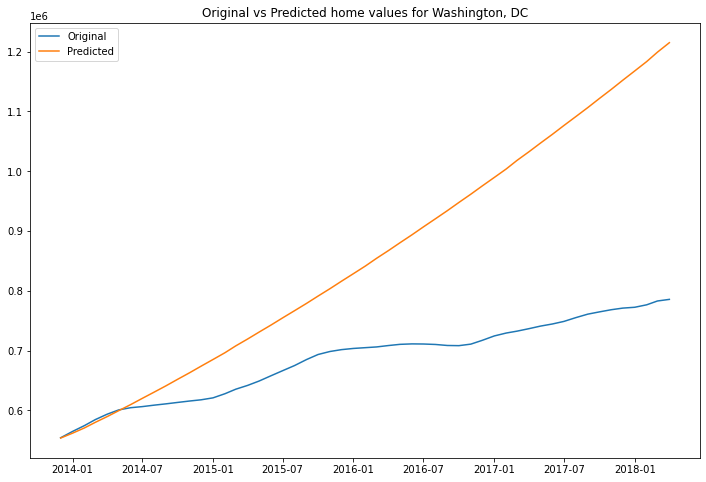

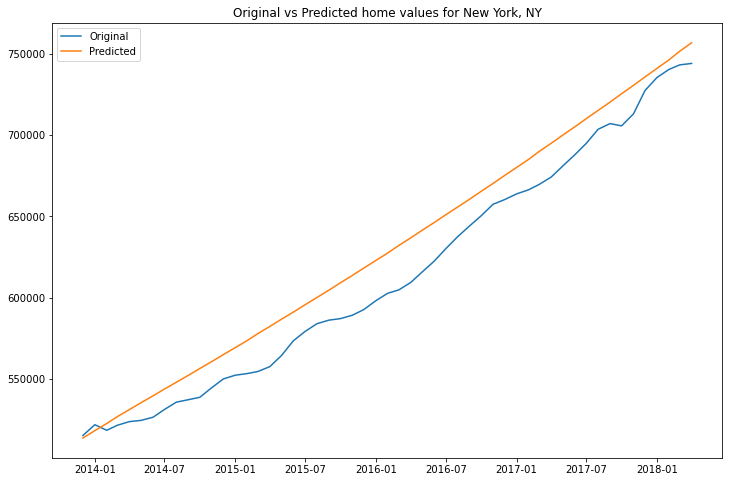

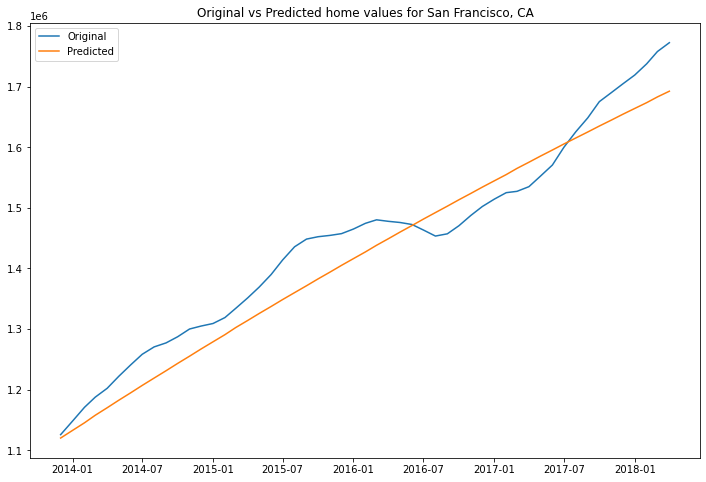

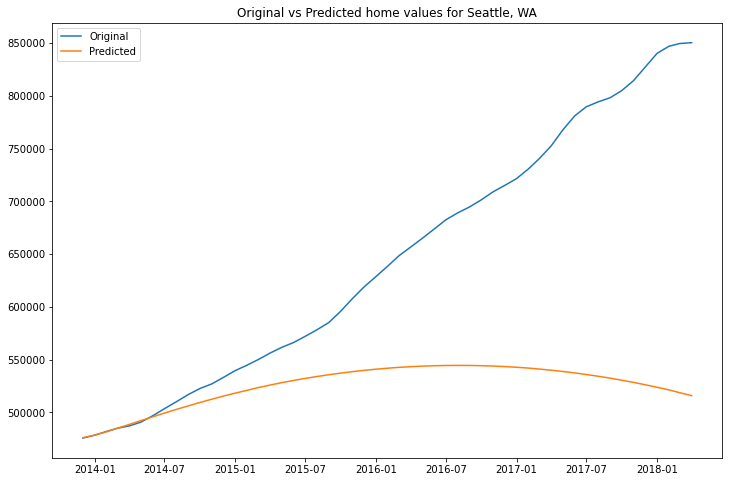

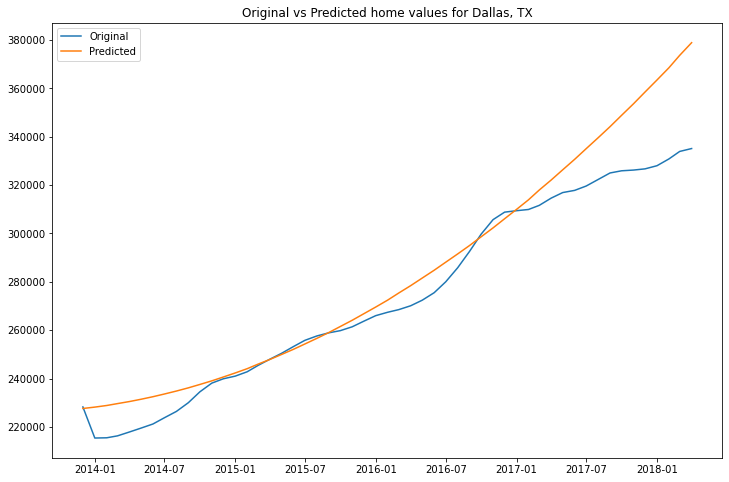

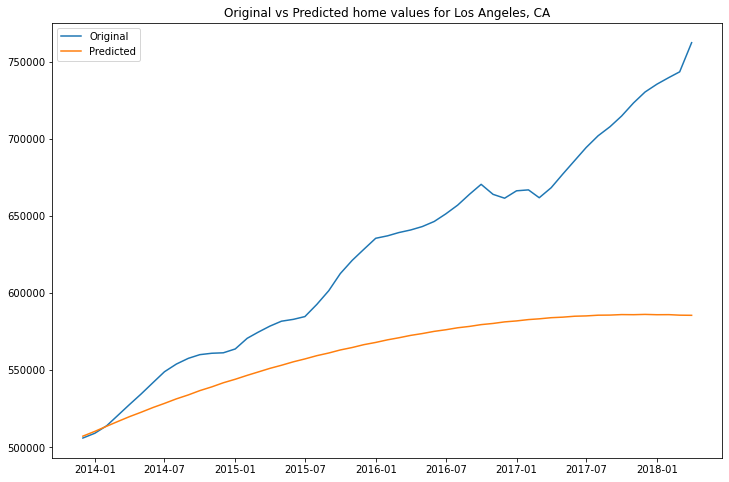

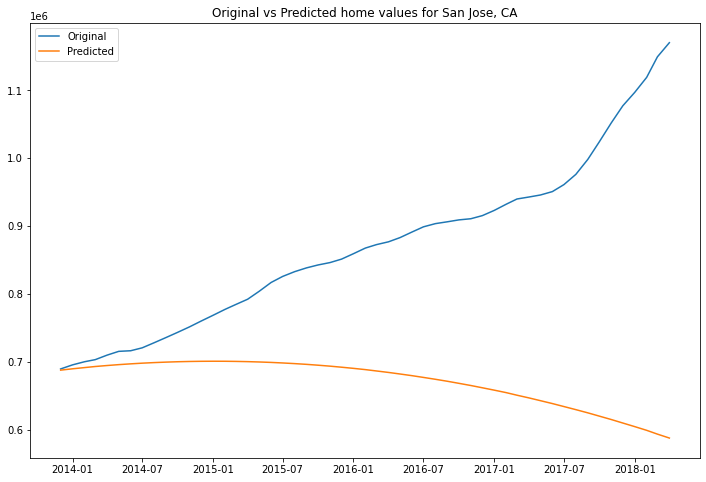

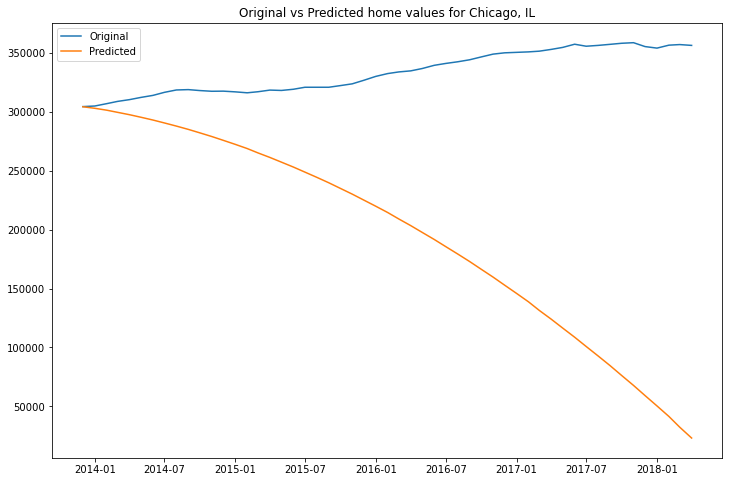

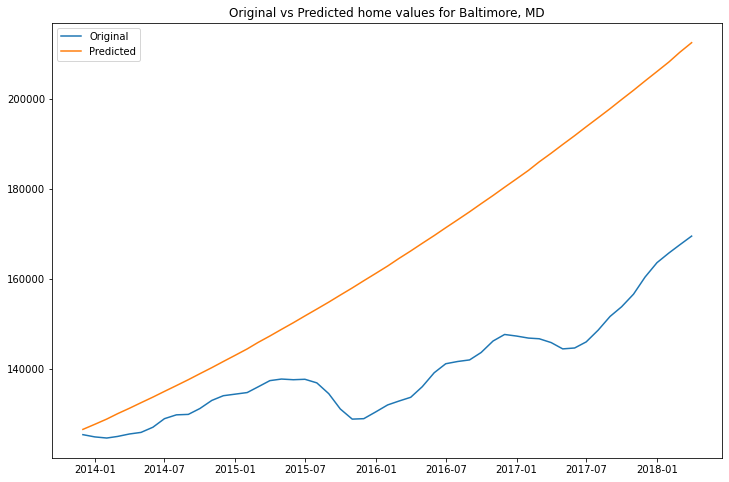

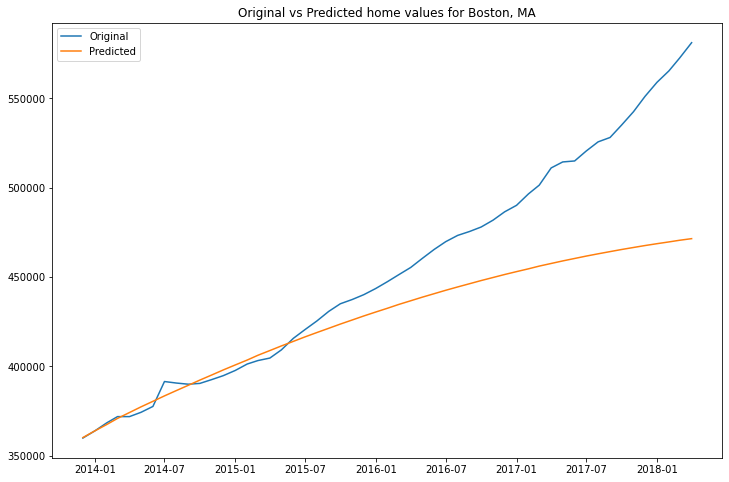

In [65]:
#3 useful graphs 
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 3,3,2)
    city_model.plot(test)

                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(2, 3, 2)   Log Likelihood               -1670.797
Date:                Wed, 11 May 2022   AIC                           3351.595
Time:                        11:21:28   BIC                           3368.306
Sample:                    04-01-1996   HQIC                          3358.351
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5436      0.170      9.087      0.000       1.211       1.877
ar.L2         -0.6567      0.122     -5.371      0.000      -0.896      -0.417
ma.L1         -1.7715      0.176    -10.064      0.0

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(2, 3, 2)   Log Likelihood               -1966.857
Date:                Wed, 11 May 2022   AIC                           3943.714
Time:                        11:21:28   BIC                           3960.425
Sample:                    04-01-1996   HQIC                          3950.470
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0619      0.062    -17.052      0.000      -1.184      -0.940
ar.L2         -0.0688      0.044     -1.559      0.119      -0.155       0.018
ma.L1         -0.0064      0.060     -0.107      0.9

                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  212
Model:                 ARIMA(2, 3, 2)   Log Likelihood               -1923.048
Date:                Wed, 11 May 2022   AIC                           3856.096
Time:                        11:21:31   BIC                           3872.808
Sample:                    04-01-1996   HQIC                          3862.852
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1281      0.033    -34.253      0.000      -1.193      -1.064
ar.L2         -0.1281      0.033     -3.892      0.000      -0.193      -0.064
ma.L1         -0.0003      0.149     -0.002      0.9

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:          Baltimore, MD   No. Observations:                  212
Model:                 ARIMA(2, 3, 2)   Log Likelihood               -1630.420
Date:                Wed, 11 May 2022   AIC                           3270.839
Time:                        11:21:33   BIC                           3287.551
Sample:                    04-01-1996   HQIC                          3277.596
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2113      0.131      1.607      0.108      -0.046       0.469
ar.L2         -0.0557      0.088     -0.632      0.527      -0.228       0.117
ma.L1         -0.7416      0.139     -5.339      0.0

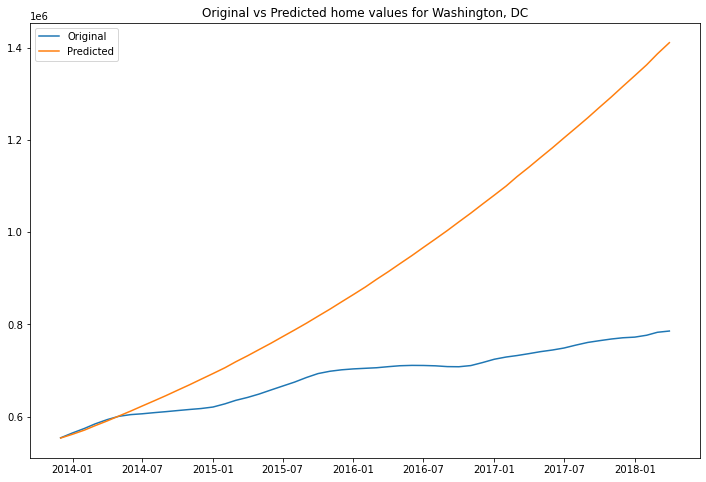

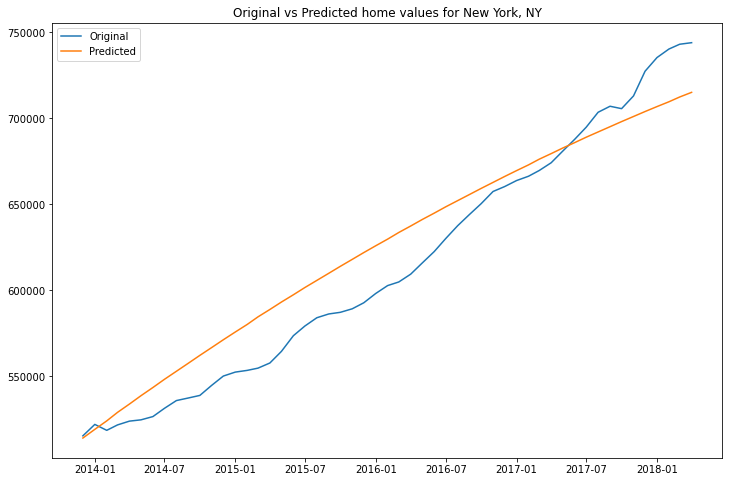

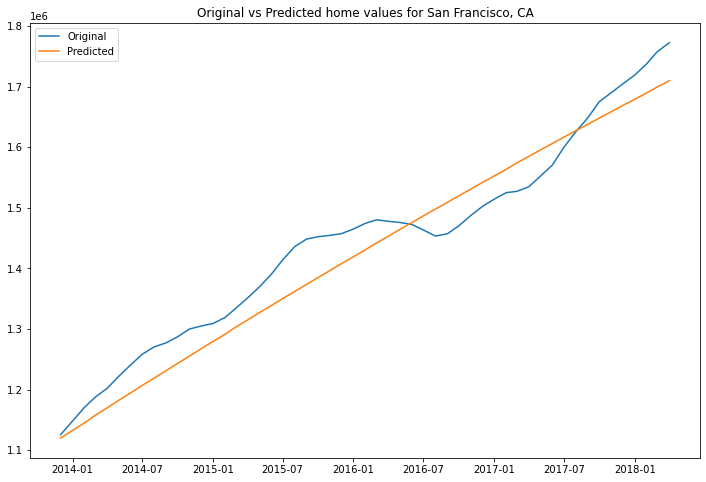

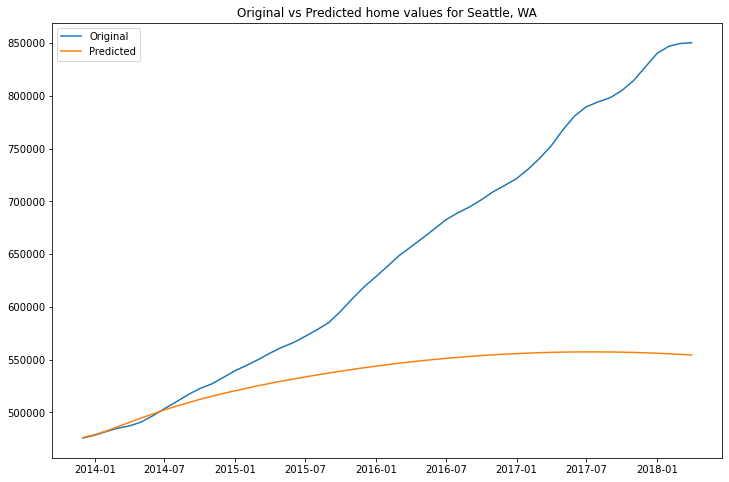

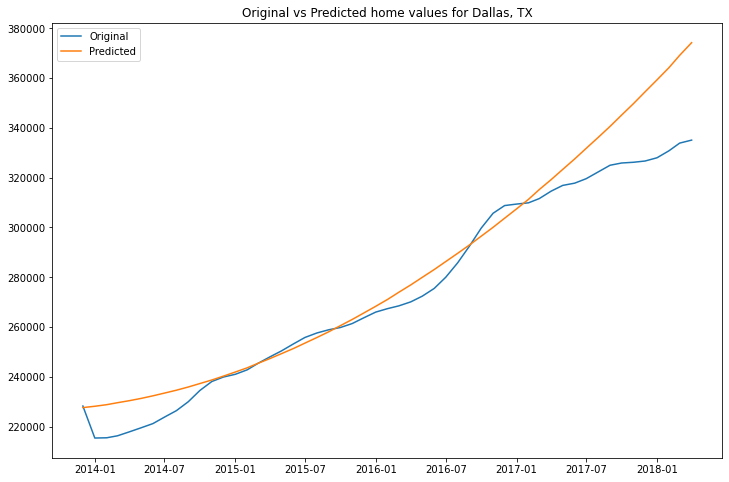

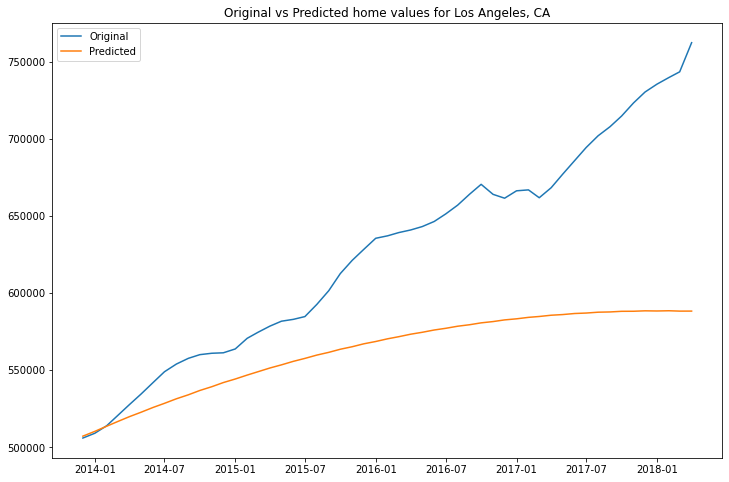

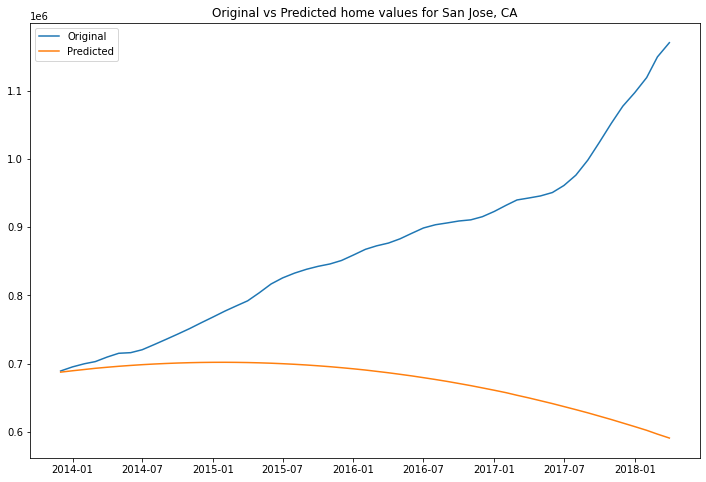

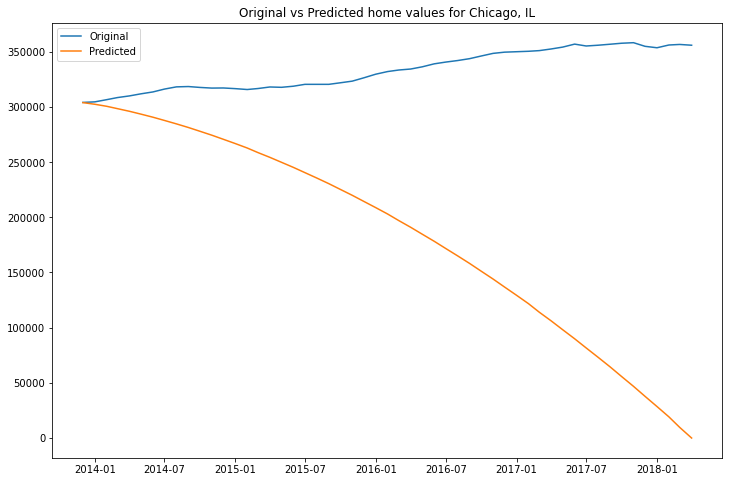

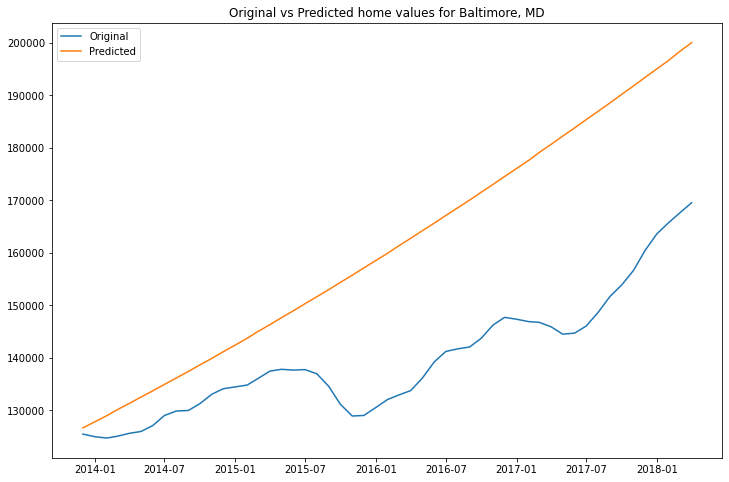

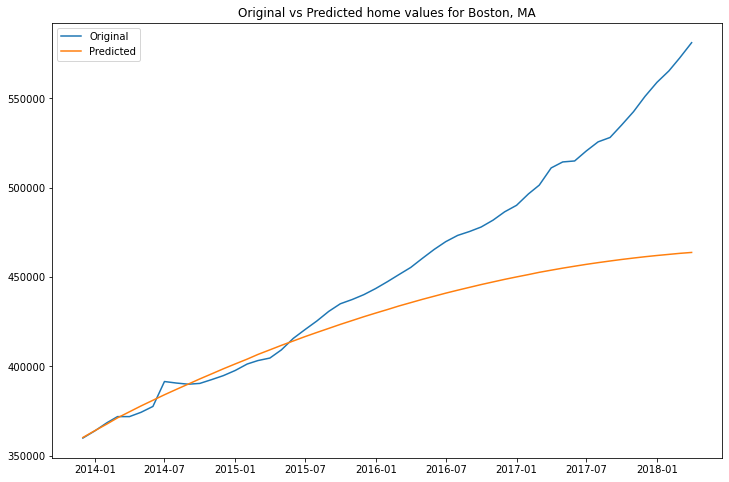

In [63]:
#3 useful graphs
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 2,3,2)
    city_model.plot(test)

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1664.438
Date:                Wed, 11 May 2022   AIC                           3346.876
Time:                        11:30:41   BIC                           3376.914
Sample:                    04-01-1996   HQIC                          3359.022
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9414      0.091    -10.318      0.000      -1.120      -0.763
ar.L2          0.4701      0.099      4.731      0.000       0.275       0.665
ar.L3          0.4540      0.099      4.568      0.0

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -2014.618
Date:                Wed, 11 May 2022   AIC                           4047.237
Time:                        11:30:42   BIC                           4077.275
Sample:                    04-01-1996   HQIC                          4059.383
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6744     35.179     -0.019      0.985     -69.624      68.275
ar.L2         -0.4696      6.520     -0.072      0.943     -13.249      12.310
ar.L3         -1.0477     22.135     -0.047      0.9

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:      San Francisco, CA   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1994.800
Date:                Wed, 11 May 2022   AIC                           4007.599
Time:                        11:30:43   BIC                           4037.637
Sample:                    04-01-1996   HQIC                          4019.745
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9657      3.869     -0.508      0.611      -9.548       5.617
ar.L2         -1.6849      6.111     -0.276      0.783     -13.663      10.293
ar.L3         -0.5989      3.963     -0.151      0.8

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:            Seattle, WA   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1742.320
Date:                Wed, 11 May 2022   AIC                           3502.640
Time:                        11:30:45   BIC                           3532.678
Sample:                    04-01-1996   HQIC                          3514.786
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5300      1.780     -0.298      0.766      -4.019       2.959
ar.L2         -0.3828      0.819     -0.467      0.640      -1.988       1.223
ar.L3         -0.7991      1.455     -0.549      0.5

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Dallas, TX   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1604.484
Date:                Wed, 11 May 2022   AIC                           3226.967
Time:                        11:30:46   BIC                           3257.005
Sample:                    04-01-1996   HQIC                          3239.113
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1289      0.419     -2.693      0.007      -1.951      -0.307
ar.L2         -0.8422      0.165     -5.119      0.000      -1.165      -0.520
ar.L3         -0.1561      0.269     -0.580      0.5

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1965.983
Date:                Wed, 11 May 2022   AIC                           3949.966
Time:                        11:30:47   BIC                           3980.004
Sample:                    04-01-1996   HQIC                          3962.112
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.5820     27.592     -0.094      0.925     -56.661      51.497
ar.L2         -3.0186     50.611     -0.060      0.952    -102.215      96.178
ar.L3         -1.8322     46.376     -0.040      0.9

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           San Jose, CA   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1915.747
Date:                Wed, 11 May 2022   AIC                           3849.494
Time:                        11:30:49   BIC                           3879.532
Sample:                    04-01-1996   HQIC                          3861.640
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4658      8.619      0.054      0.957     -16.427      17.359
ar.L2          0.7105     11.989      0.059      0.953     -22.788      24.209
ar.L3         -0.7845      5.001     -0.157      0.8

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:            Chicago, IL   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1735.535
Date:                Wed, 11 May 2022   AIC                           3489.071
Time:                        11:30:50   BIC                           3519.109
Sample:                    04-01-1996   HQIC                          3501.217
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3484      0.083    -16.204      0.000      -1.512      -1.185
ar.L2          0.1956      0.116      1.688      0.091      -0.032       0.423
ar.L3          0.6886      0.131      5.244      0.0

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:          Baltimore, MD   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1625.464
Date:                Wed, 11 May 2022   AIC                           3268.928
Time:                        11:30:51   BIC                           3298.966
Sample:                    04-01-1996   HQIC                          3281.074
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1403      0.055    -20.878      0.000      -1.247      -1.033
ar.L2         -0.4871      0.100     -4.876      0.000      -0.683      -0.291
ar.L3          0.1534      0.096      1.597      0.1

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1779.066
Date:                Wed, 11 May 2022   AIC                           3576.132
Time:                        11:30:53   BIC                           3606.170
Sample:                    04-01-1996   HQIC                          3588.278
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4461      6.588     -0.220      0.826     -14.358      11.466
ar.L2         -1.5057      3.405     -0.442      0.658      -8.179       5.167
ar.L3         -1.1705      6.746     -0.174      0.8

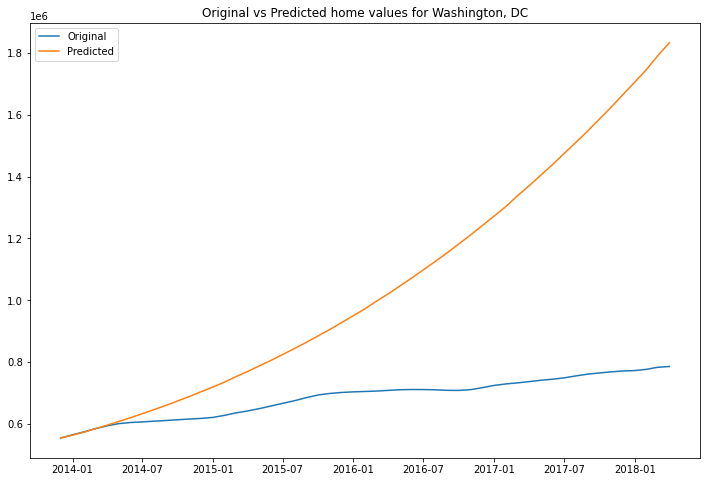

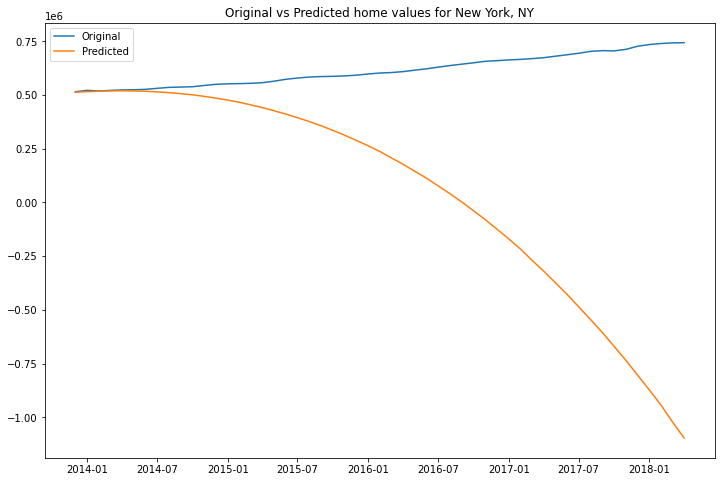

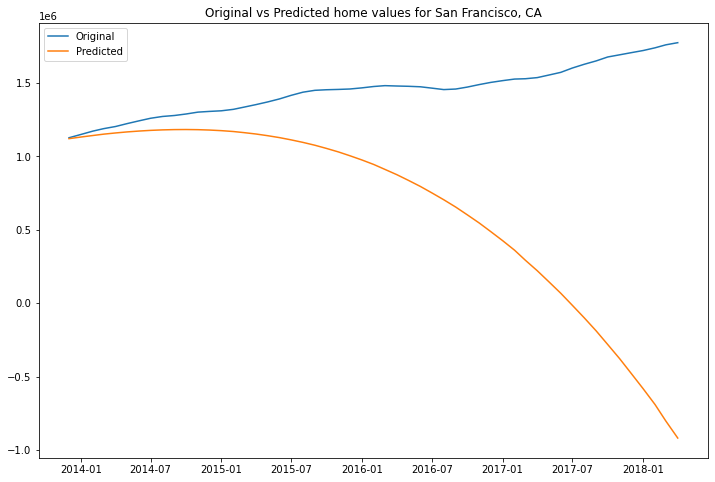

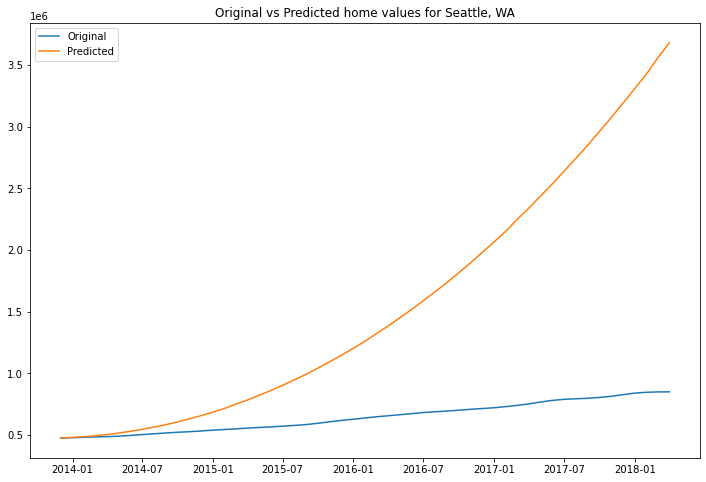

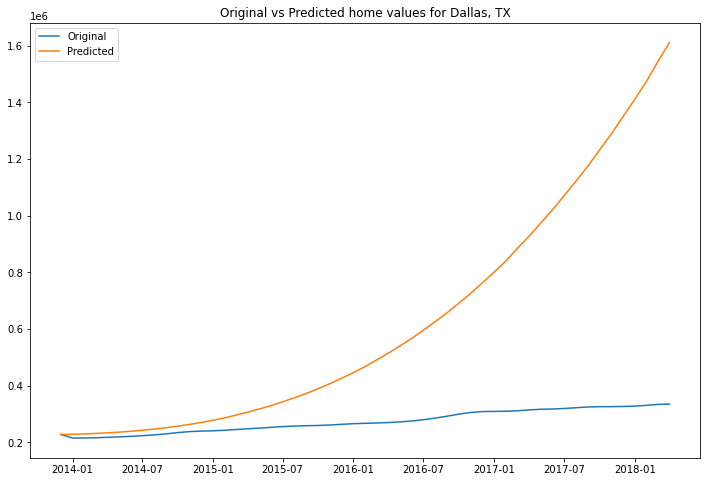

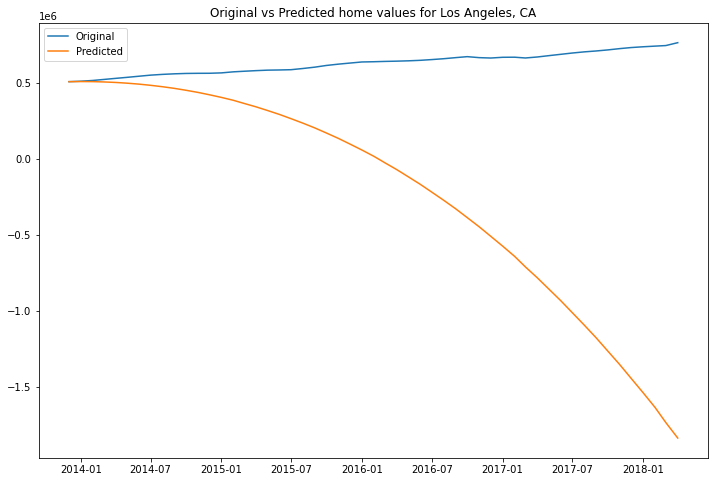

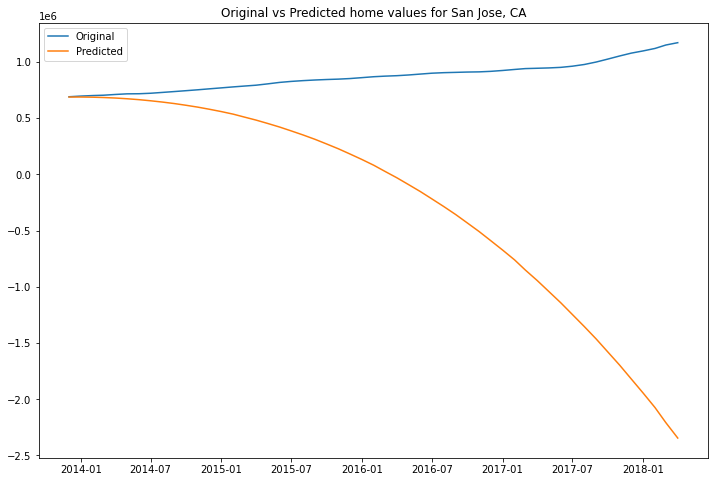

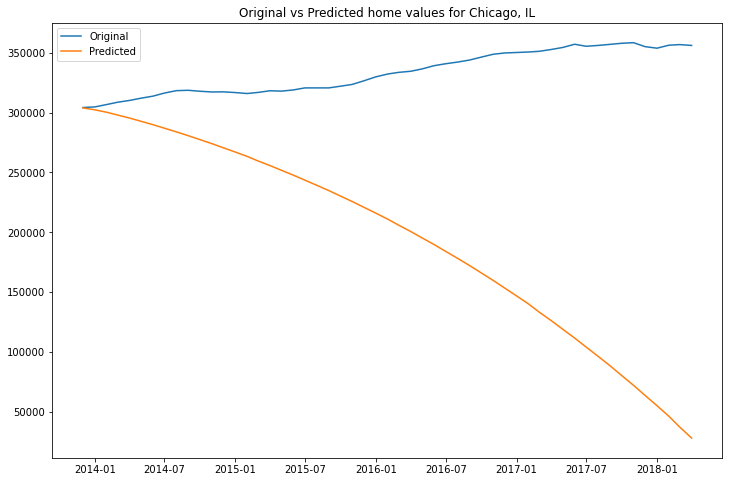

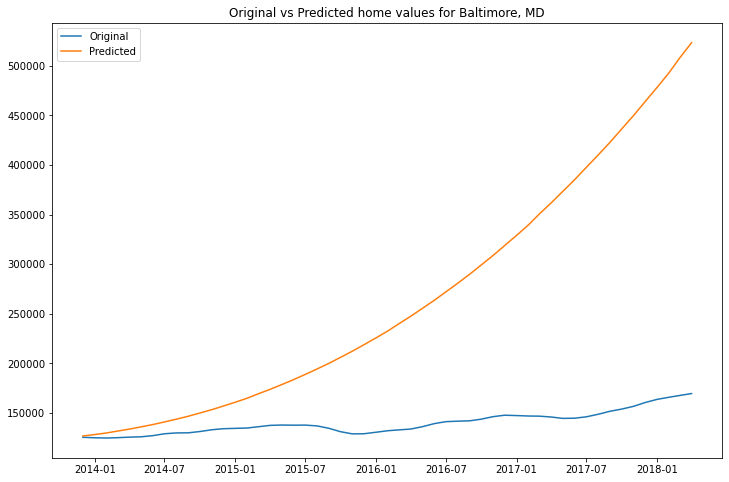

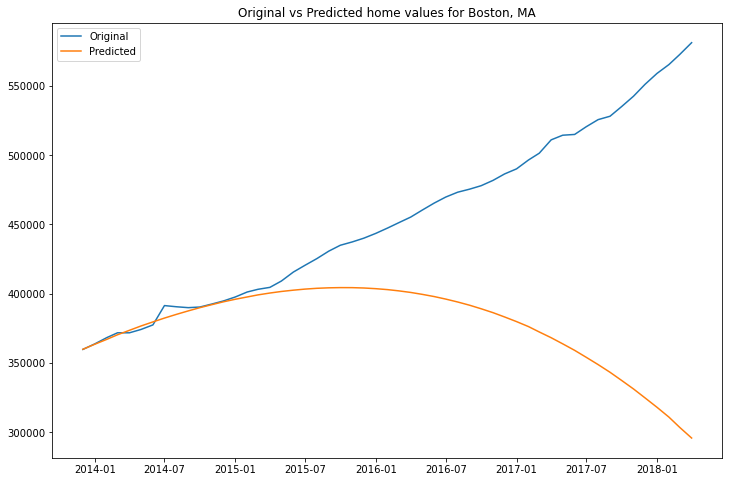

In [66]:
#not using this one
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 4,4,4)
    city_model.plot(test)

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(3, 3, 3)   Log Likelihood               -1675.162
Date:                Wed, 11 May 2022   AIC                           3364.323
Time:                        11:32:09   BIC                           3387.720
Sample:                    04-01-1996   HQIC                          3373.783
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1609      0.278     -0.579      0.562      -0.705       0.383
ar.L2          0.5840      0.229      2.553      0.011       0.136       1.032
ar.L3         -0.0109      0.205     -0.053      0.9

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(3, 3, 3)   Log Likelihood               -1967.267
Date:                Wed, 11 May 2022   AIC                           3948.533
Time:                        11:32:10   BIC                           3971.930
Sample:                    04-01-1996   HQIC                          3957.993
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5471      1.160     -1.334      0.182      -3.820       0.726
ar.L2         -0.9916      1.215     -0.816      0.415      -3.374       1.390
ar.L3         -0.0588      0.077     -0.760      0.4

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Dallas, TX   No. Observations:                  212
Model:                 ARIMA(3, 3, 3)   Log Likelihood               -1544.087
Date:                Wed, 11 May 2022   AIC                           3102.175
Time:                        11:32:13   BIC                           3125.571
Sample:                    04-01-1996   HQIC                          3111.634
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2563      0.071      3.623      0.000       0.118       0.395
ar.L2         -0.2248      0.061     -3.693      0.000      -0.344      -0.106
ar.L3          0.8522      0.058     14.690      0.0

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  212
Model:                 ARIMA(3, 3, 3)   Log Likelihood               -1924.674
Date:                Wed, 11 May 2022   AIC                           3863.347
Time:                        11:32:14   BIC                           3886.743
Sample:                    04-01-1996   HQIC                          3872.806
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8042      5.084     -0.355      0.723     -11.769       8.160
ar.L2         -0.9808      4.885     -0.201      0.841     -10.556       8.594
ar.L3         -0.1015      0.582     -0.174      0.8

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:          Baltimore, MD   No. Observations:                  212
Model:                 ARIMA(3, 3, 3)   Log Likelihood               -1630.097
Date:                Wed, 11 May 2022   AIC                           3274.195
Time:                        11:32:17   BIC                           3297.591
Sample:                    04-01-1996   HQIC                          3283.654
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8063      0.282      2.861      0.004       0.254       1.359
ar.L2          0.0198      0.251      0.079      0.937      -0.473       0.512
ar.L3         -0.0870      0.107     -0.811      0.4

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  212
Model:                 ARIMA(3, 3, 3)   Log Likelihood               -1753.983
Date:                Wed, 11 May 2022   AIC                           3521.965
Time:                        11:32:18   BIC                           3545.362
Sample:                    04-01-1996   HQIC                          3531.424
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3981      0.114      3.494      0.000       0.175       0.621
ar.L2          0.8460      0.107      7.921      0.000       0.637       1.055
ar.L3         -0.5362      0.065     -8.225      0.0

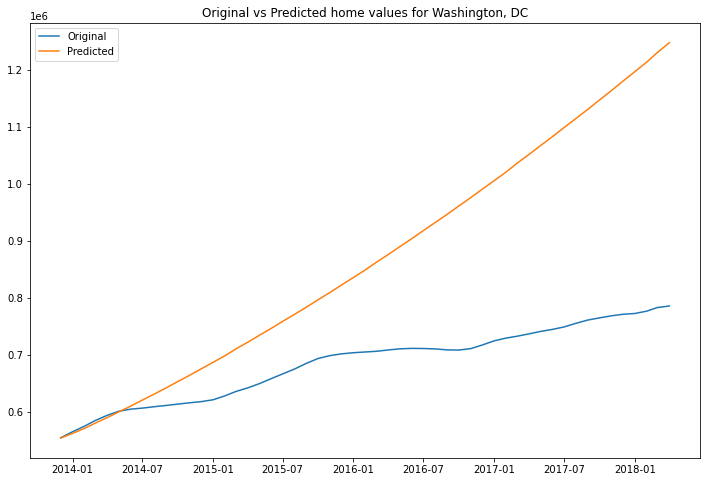

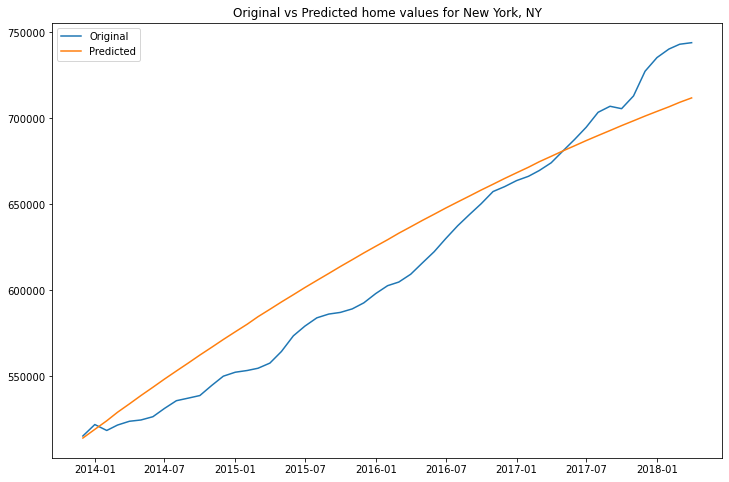

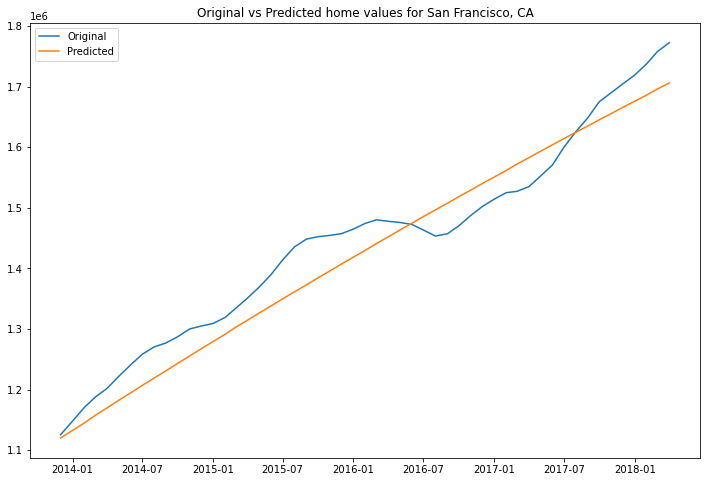

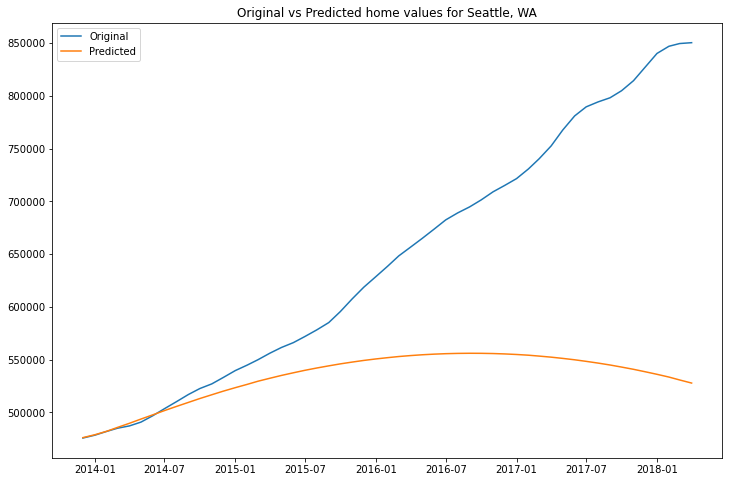

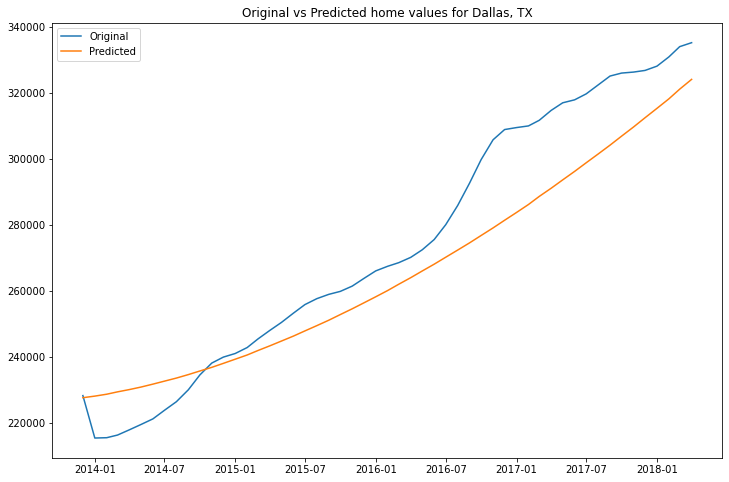

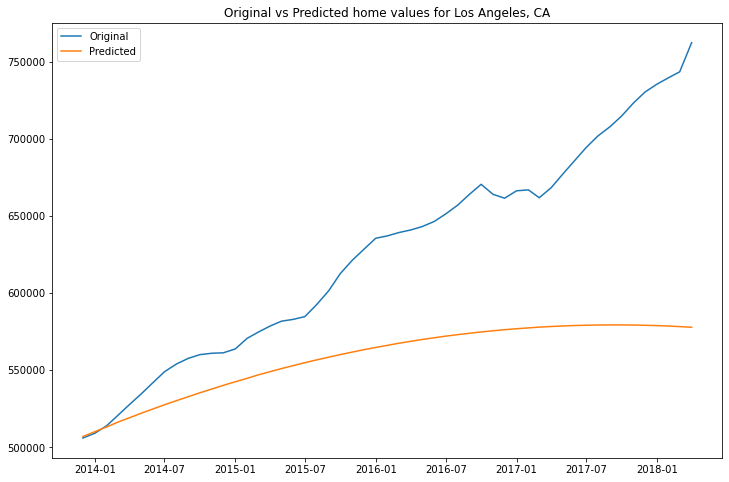

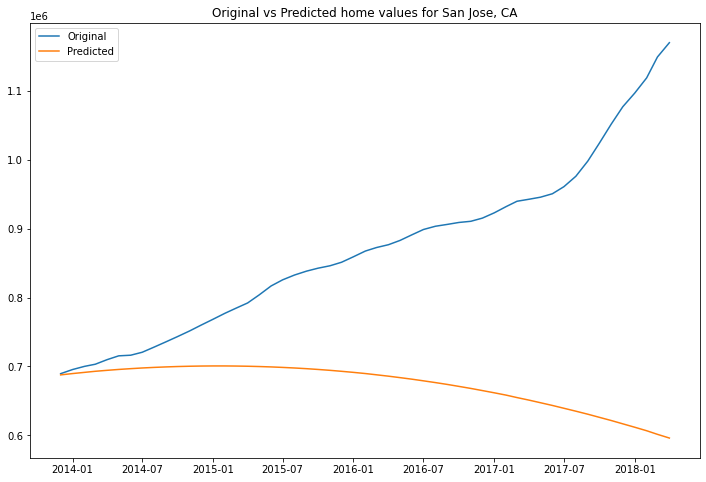

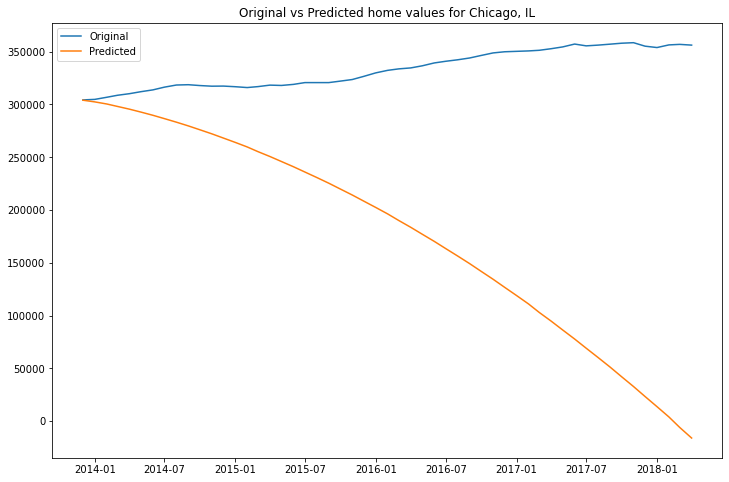

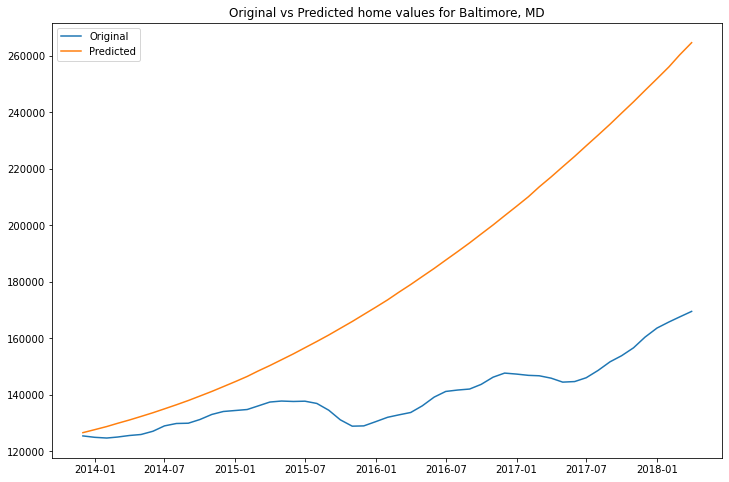

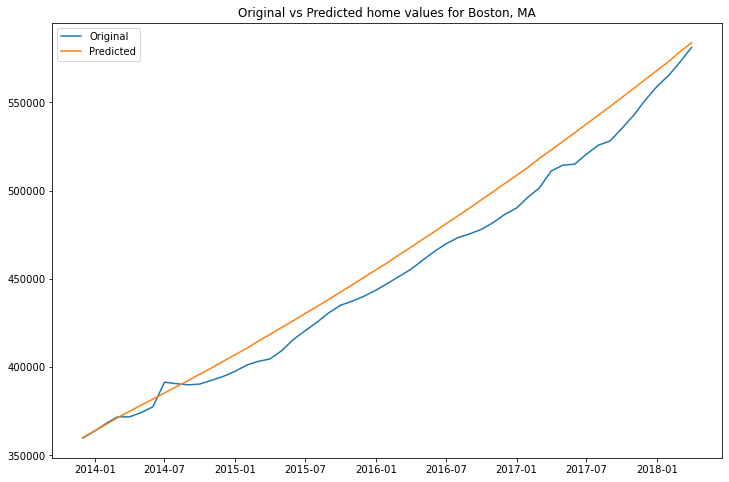

In [67]:
#4 useful graphs
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 3,3,3)
    city_model.plot(test)

                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(3, 3, 4)   Log Likelihood               -1672.960
Date:                Wed, 11 May 2022   AIC                           3361.919
Time:                        11:50:32   BIC                           3388.658
Sample:                    04-01-1996   HQIC                          3372.730
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3683      1.578     -0.233      0.815      -3.462       2.725
ar.L2          0.5706      0.254      2.244      0.025       0.072       1.069
ar.L3          0.0868      0.752      0.115      0.9

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(3, 3, 4)   Log Likelihood               -1963.875
Date:                Wed, 11 May 2022   AIC                           3943.750
Time:                        11:50:33   BIC                           3970.489
Sample:                    04-01-1996   HQIC                          3954.561
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0350      0.203     -5.093      0.000      -1.433      -0.637
ar.L2         -1.0656      0.034    -31.398      0.000      -1.132      -0.999
ar.L3         -0.9602      0.204     -4.718      0.0

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Dallas, TX   No. Observations:                  212
Model:                 ARIMA(3, 3, 4)   Log Likelihood               -1543.402
Date:                Wed, 11 May 2022   AIC                           3102.805
Time:                        11:50:37   BIC                           3129.543
Sample:                    04-01-1996   HQIC                          3113.615
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2686      0.510     -0.527      0.598      -1.267       0.730
ar.L2         -0.6027      0.378     -1.595      0.111      -1.343       0.138
ar.L3          0.4284      0.475      0.902      0.3

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  212
Model:                 ARIMA(3, 3, 4)   Log Likelihood               -1925.604
Date:                Wed, 11 May 2022   AIC                           3867.208
Time:                        11:50:38   BIC                           3893.947
Sample:                    04-01-1996   HQIC                          3878.019
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7274      1.498     -1.153      0.249      -4.663       1.208
ar.L2         -0.8808      1.655     -0.532      0.595      -4.125       2.363
ar.L3         -0.0403      0.221     -0.183      0.8

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  212
Model:                 ARIMA(3, 3, 4)   Log Likelihood               -1758.209
Date:                Wed, 11 May 2022   AIC                           3532.418
Time:                        11:50:43   BIC                           3559.157
Sample:                    04-01-1996   HQIC                          3543.229
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6823      0.176     -3.878      0.000      -1.027      -0.337
ar.L2         -0.3797      0.160     -2.377      0.017      -0.693      -0.067
ar.L3          0.4576      0.109      4.195      0.0

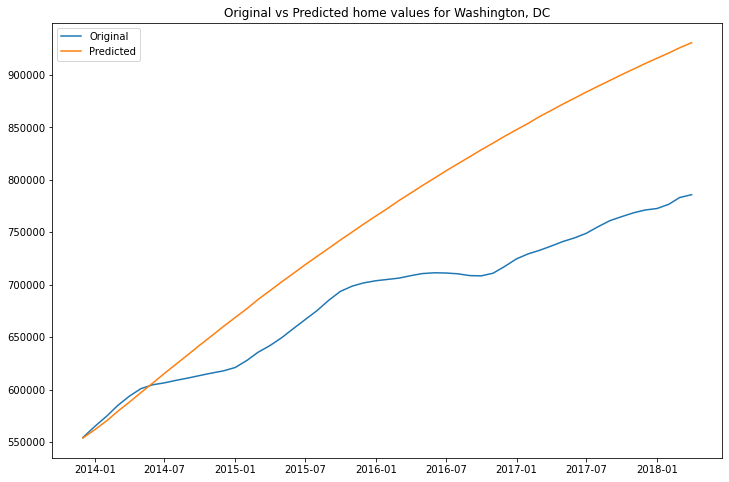

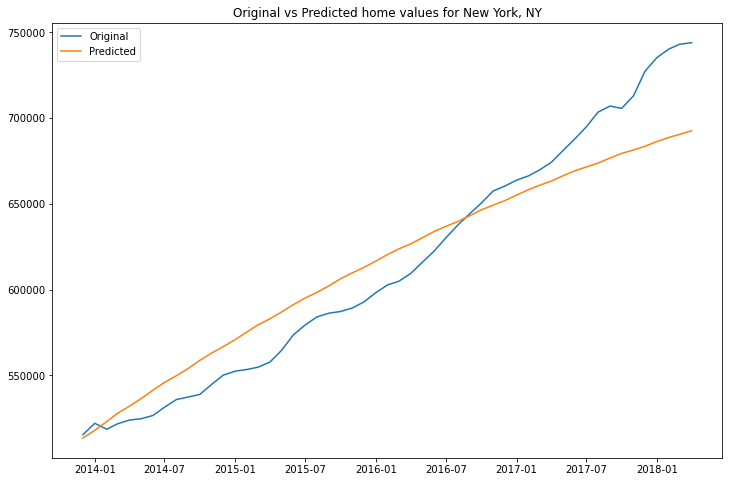

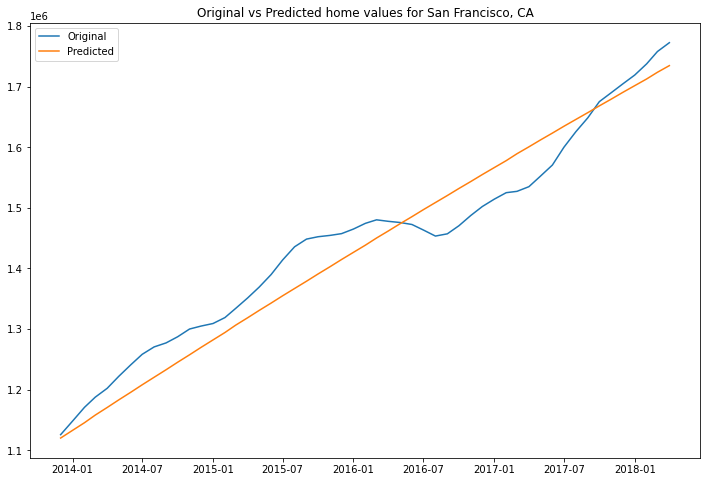

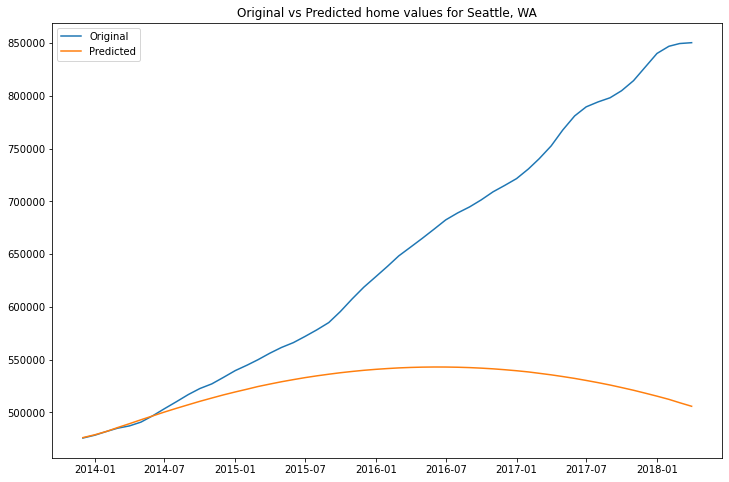

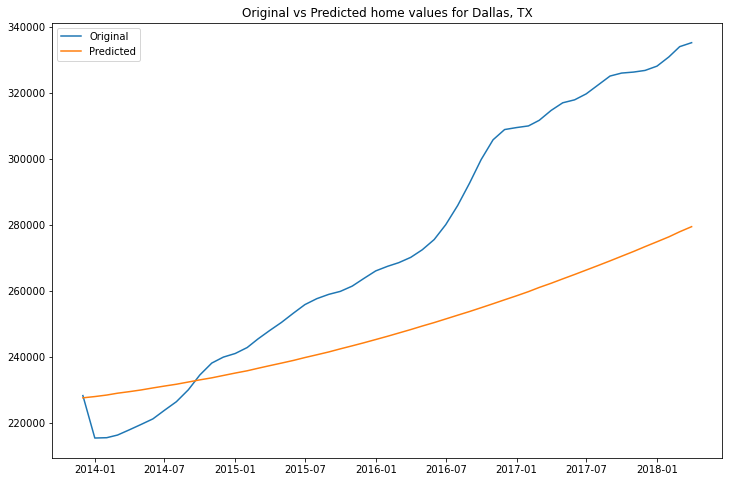

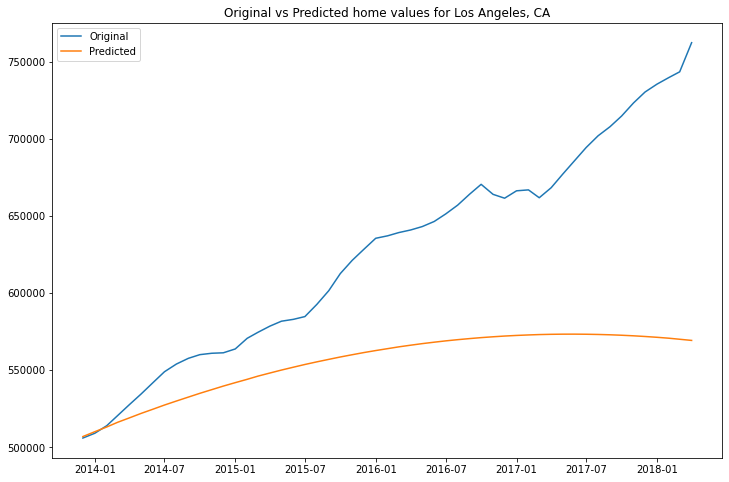

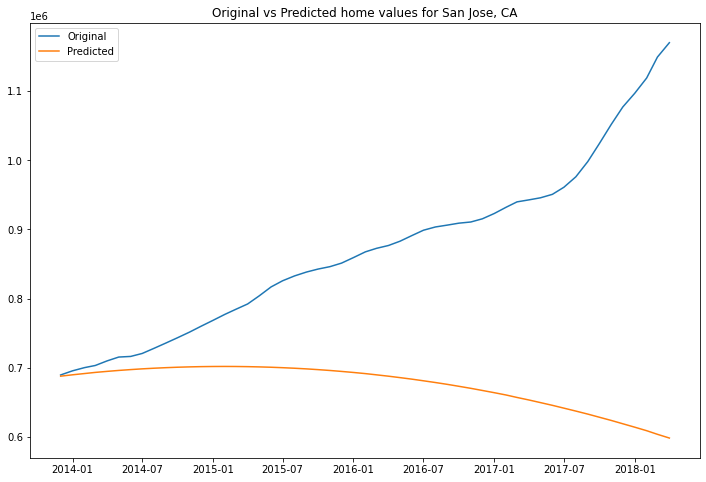

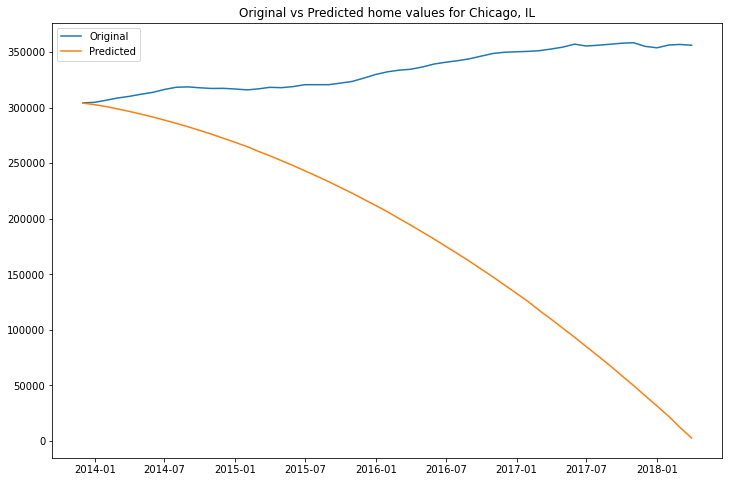

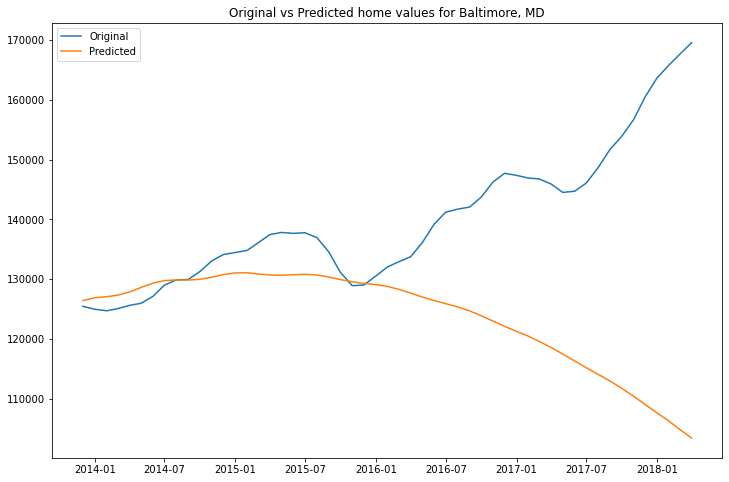

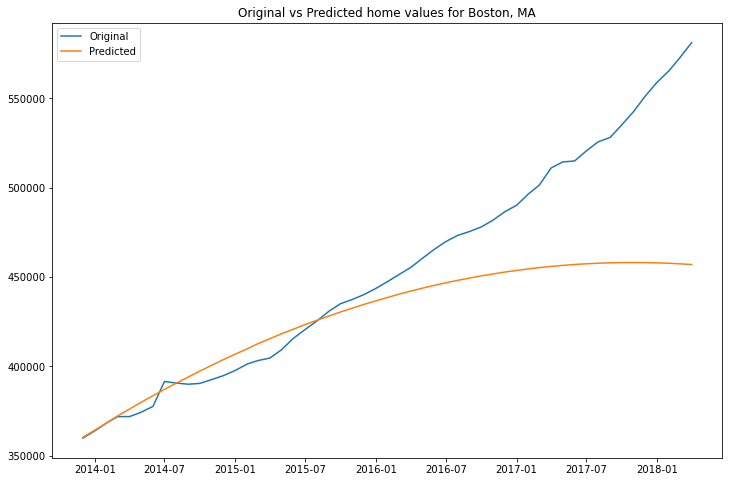

In [68]:
#3 good models
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 3,3,4)
    city_model.plot(test)

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(2, 3, 5)   Log Likelihood               -1673.505
Date:                Wed, 11 May 2022   AIC                           3363.010
Time:                        11:52:48   BIC                           3389.748
Sample:                    04-01-1996   HQIC                          3373.820
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0762      0.490     -0.155      0.876      -1.037       0.885
ar.L2          0.3935      0.358      1.098      0.272      -0.309       1.096
ma.L1         -0.1189      0.490     -0.243      0.8

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(2, 3, 5)   Log Likelihood               -1966.490
Date:                Wed, 11 May 2022   AIC                           3948.981
Time:                        11:52:50   BIC                           3975.720
Sample:                    04-01-1996   HQIC                          3959.791
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4664      0.834     -0.560      0.576      -2.100       1.167
ar.L2         -0.7659      0.798     -0.959      0.337      -2.331       0.799
ma.L1         -0.6144      0.839     -0.733      0.4

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:            Seattle, WA   No. Observations:                  212
Model:                 ARIMA(2, 3, 5)   Log Likelihood               -1748.587
Date:                Wed, 11 May 2022   AIC                           3513.174
Time:                        11:52:53   BIC                           3539.913
Sample:                    04-01-1996   HQIC                          3523.985
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0356      0.146      0.243      0.808      -0.251       0.322
ar.L2         -0.8438      0.121     -6.963      0.000      -1.081      -0.606
ma.L1         -0.2632      0.149     -1.762      0.0

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Dallas, TX   No. Observations:                  212
Model:                 ARIMA(2, 3, 5)   Log Likelihood               -1545.669
Date:                Wed, 11 May 2022   AIC                           3107.338
Time:                        11:52:54   BIC                           3134.077
Sample:                    04-01-1996   HQIC                          3118.148
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7042      0.051    -13.871      0.000      -0.804      -0.605
ar.L2         -0.8963      0.042    -21.171      0.000      -0.979      -0.813
ma.L1          0.6251      0.053     11.769      0.0

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  212
Model:                 ARIMA(2, 3, 5)   Log Likelihood               -1925.593
Date:                Wed, 11 May 2022   AIC                           3867.186
Time:                        11:52:55   BIC                           3893.925
Sample:                    04-01-1996   HQIC                          3877.997
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7081      0.938     -1.820      0.069      -3.547       0.131
ar.L2         -0.9262      0.915     -1.012      0.311      -2.719       0.867
ma.L1          0.5849      0.943      0.620      0.5

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:            Chicago, IL   No. Observations:                  212
Model:                 ARIMA(2, 3, 5)   Log Likelihood               -1743.248
Date:                Wed, 11 May 2022   AIC                           3502.495
Time:                        11:52:58   BIC                           3529.234
Sample:                    04-01-1996   HQIC                          3513.306
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4076      0.312     -1.306      0.191      -1.019       0.204
ar.L2          0.4526      0.252      1.795      0.073      -0.041       0.947
ma.L1          0.0663      0.309      0.214      0.8

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  212
Model:                 ARIMA(2, 3, 5)   Log Likelihood               -1757.698
Date:                Wed, 11 May 2022   AIC                           3531.397
Time:                        11:53:01   BIC                           3558.135
Sample:                    04-01-1996   HQIC                          3542.207
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7913      0.693     -1.142      0.253      -2.149       0.566
ar.L2          0.0194      0.401      0.048      0.961      -0.767       0.806
ma.L1          0.3360      0.693      0.485      0.6

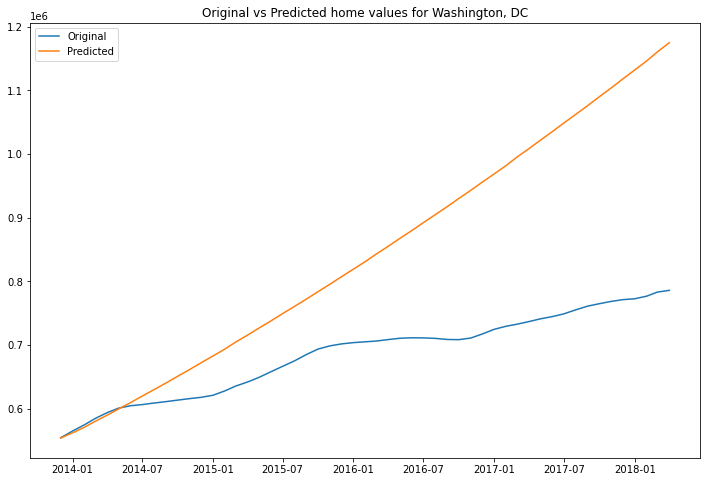

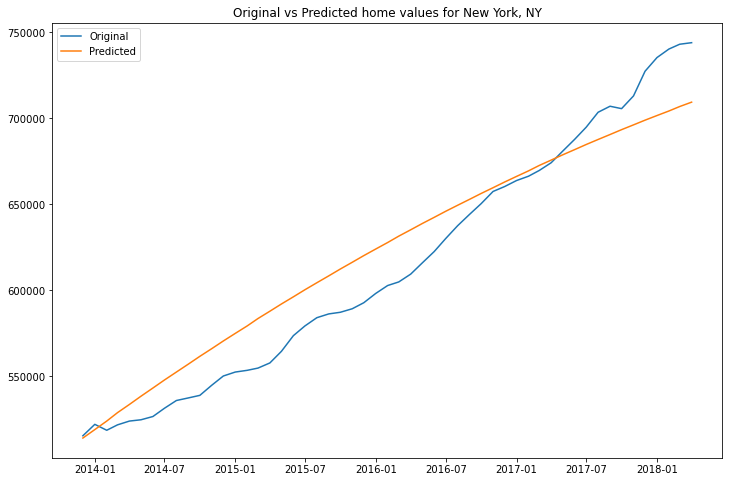

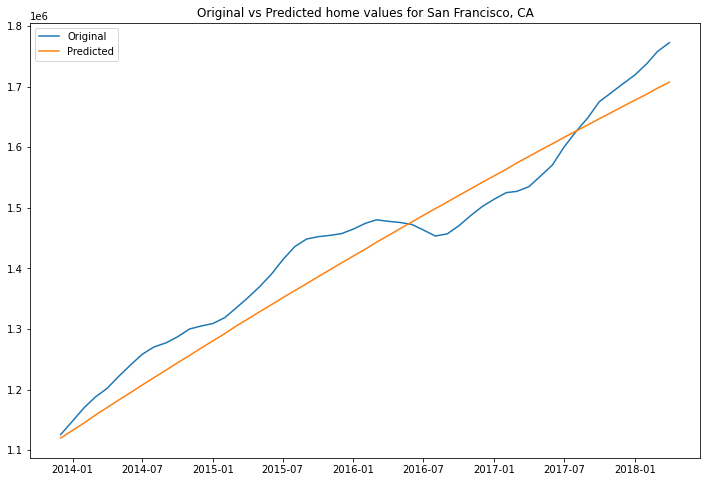

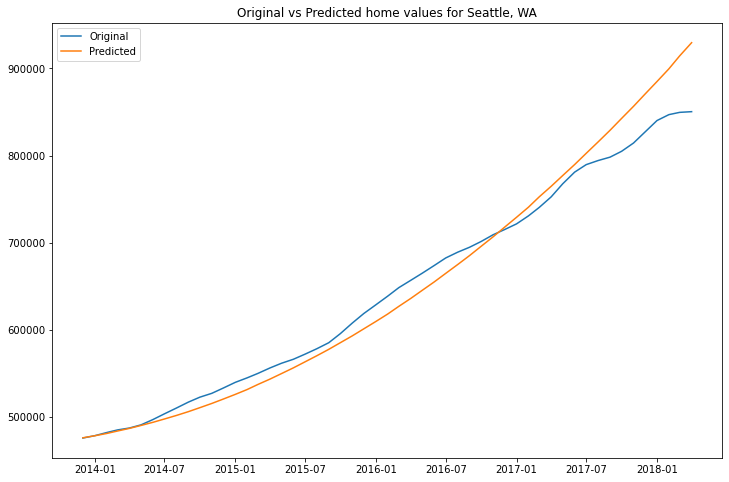

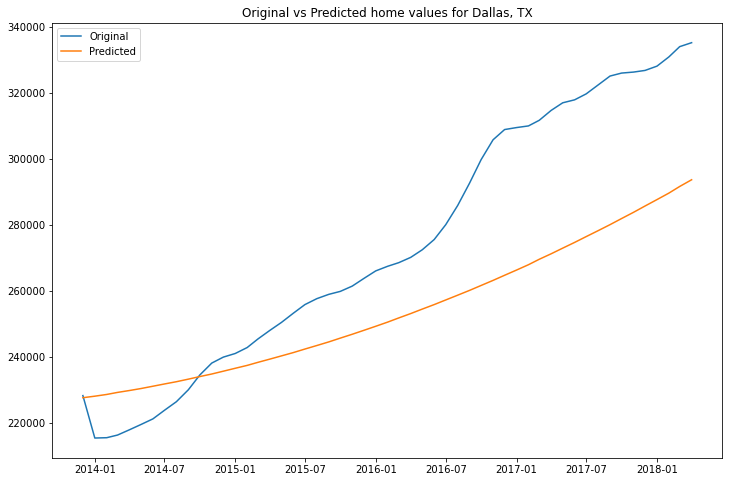

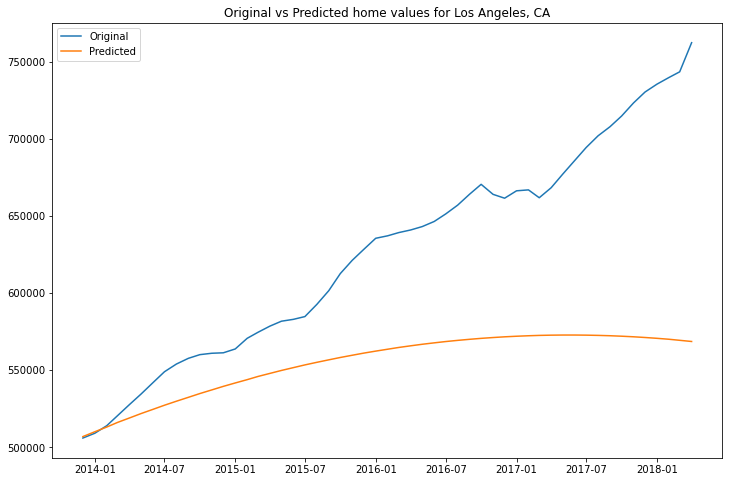

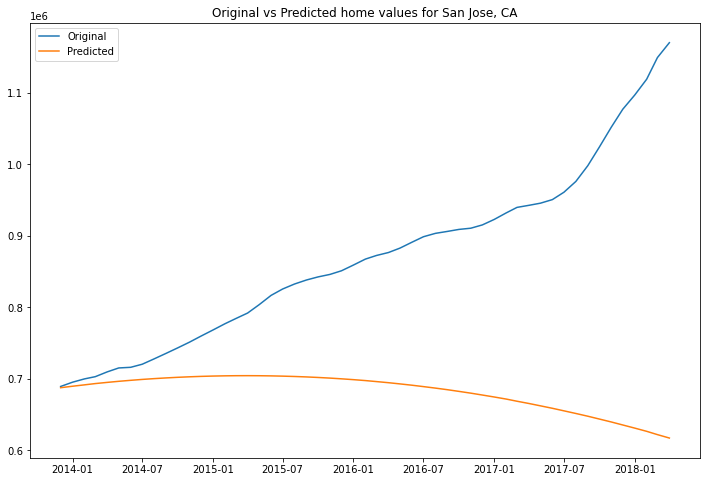

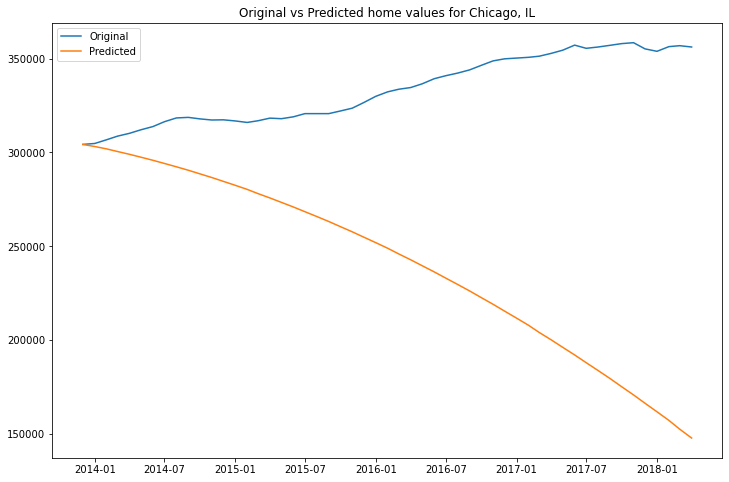

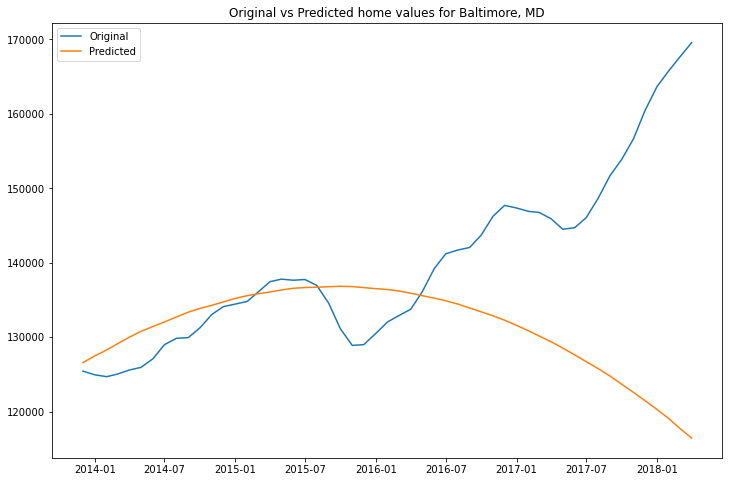

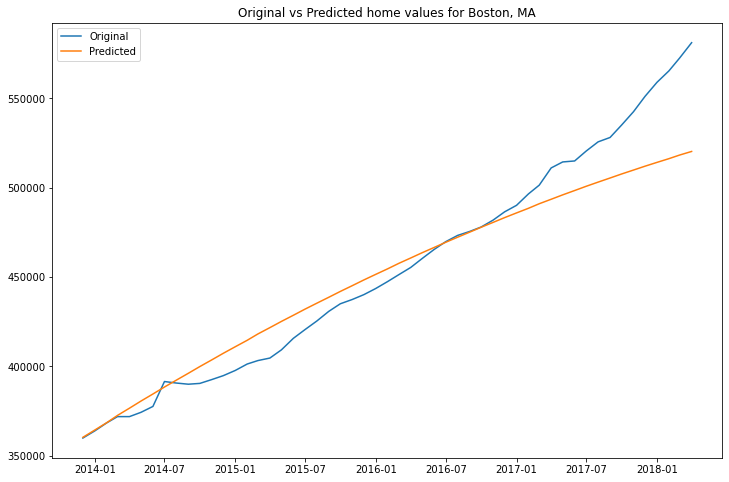

In [71]:
#Seattle works for this one.
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 2,3,5)
    city_model.plot(test)

In [60]:
city_222 = ['Washington, DC', 'Boston, MA','Los Angeles, CA', 'San Francisco, CA']

In [61]:
forecast_mod = ARIMA(melted_df['Washington, DC'], order = [2,2,2]).fit()
forecasted_df = forecast_mod.forecast(steps=120)
forecasted_df

2018-05-01    7.882895e+05
2018-06-01    7.906832e+05
2018-07-01    7.930073e+05
2018-08-01    7.953425e+05
2018-09-01    7.977355e+05
2018-10-01    8.001897e+05
2018-11-01    8.026796e+05
2018-12-01    8.051722e+05
2019-01-01    8.076453e+05
2019-02-01    8.100935e+05
2019-03-01    8.125247e+05
2019-04-01    8.149518e+05
2019-05-01    8.173849e+05
2019-06-01    8.198278e+05
2019-07-01    8.222783e+05
2019-08-01    8.247318e+05
2019-09-01    8.271836e+05
2019-10-01    8.296319e+05
2019-11-01    8.320767e+05
2019-12-01    8.345199e+05
2020-01-01    8.369634e+05
2020-02-01    8.394082e+05
2020-03-01    8.418544e+05
2020-04-01    8.443014e+05
2020-05-01    8.467485e+05
2020-06-01    8.491951e+05
2020-07-01    8.516412e+05
2020-08-01    8.540869e+05
2020-09-01    8.565325e+05
2020-10-01    8.589782e+05
2020-11-01    8.614241e+05
2020-12-01    8.638702e+05
2021-01-01    8.663164e+05
2021-02-01    8.687626e+05
2021-03-01    8.712086e+05
2021-04-01    8.736546e+05
2021-05-01    8.761006e+05
2

Text(0.5, 1.0, 'Forecasted home values for Washington, DC')

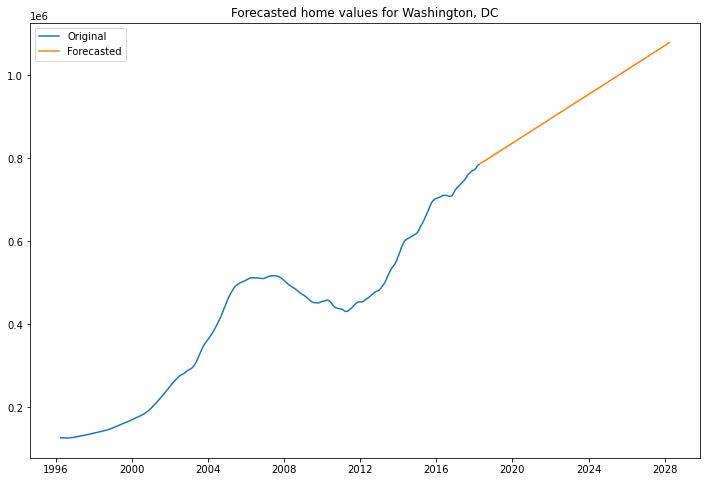

In [62]:
fig, ax = plt.subplots(figsize = (12,8)) 
ax.plot(melted_df['Washington, DC'])
ax.plot(forecasted_df)
ax.legend(['Original', 'Forecasted'])
ax.set_title(f'Forecasted home values for Washington, DC')

In [89]:
#We created an empty dictionary for our predictions 

predictions_dict = {}

#We are running a for-loop where we add the forecast to the dictionary, for every city.
for city in city_list: 
    forecast_mod = ARIMA(melted_df[city], order = [3,2,2]).fit()
    predictions_dict[city] = forecast_mod.forecast(steps=36)
    
predictions_dict    

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



{'Washington, DC': 2018-05-01    788262.569403
 2018-06-01    790816.537759
 2018-07-01    793455.239303
 2018-08-01    796205.503253
 2018-09-01    799085.887824
 2018-10-01    802106.542968
 2018-11-01    805269.096349
 2018-12-01    808567.005367
 2019-01-01    811986.355029
 2019-02-01    815507.034317
 2019-03-01    819104.204433
 2019-04-01    822749.960051
 2019-05-01    826415.078903
 2019-06-01    830070.755395
 2019-07-01    833690.220308
 2019-08-01    837250.160210
 2019-09-01    840731.866128
 2019-10-01    844122.060104
 2019-11-01    847413.369285
 2019-12-01    850604.438881
 2020-01-01    853699.696332
 2020-02-01    856708.798256
 2020-03-01    859645.808215
 2020-04-01    862528.166120
 2020-05-01    865375.518870
 2020-06-01    868208.486049
 2020-07-01    871047.434409
 2020-08-01    873911.330500
 2020-09-01    876816.732769
 2020-10-01    879776.973301
 2020-11-01    882801.565962
 2020-12-01    885895.862898
 2021-01-01    889060.966036
 2021-02-01    892293.885

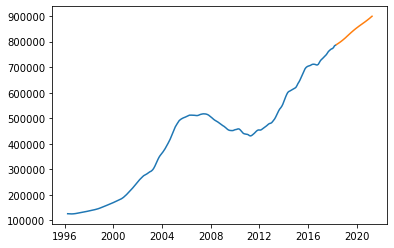

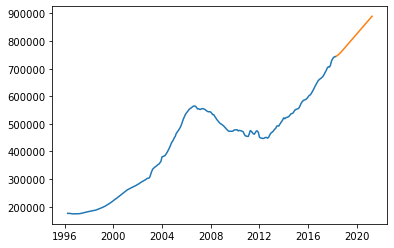

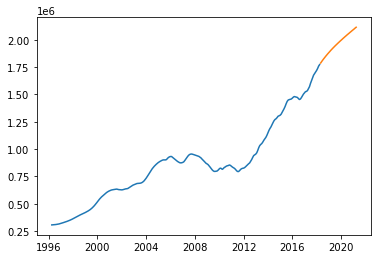

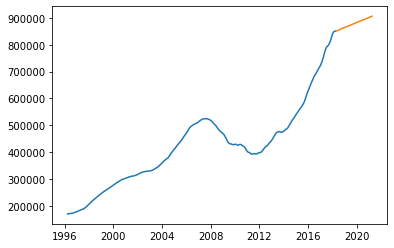

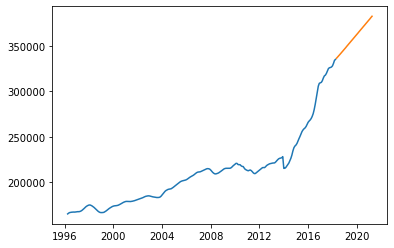

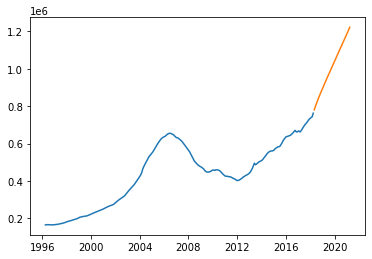

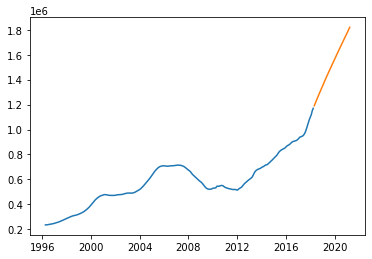

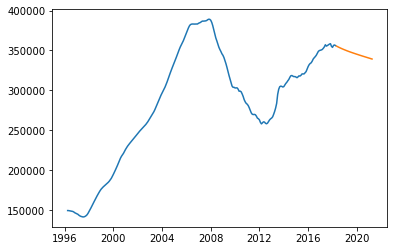

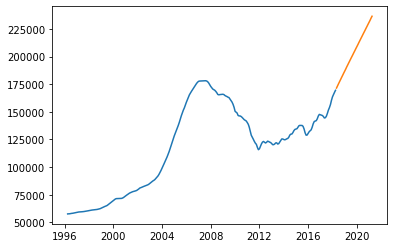

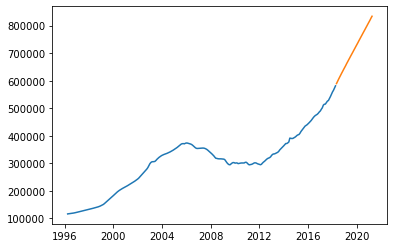

In [91]:
#We made a for loop that creates a graph that makes a prediction on home prices.




for city, predictions in predictions_dict.items():
    fig, ax = plt.subplots()
    ax.plot(melted_df[city])
    ax.plot(predictions)
    plt.show()


In [86]:
forecast_mod = ARIMA(melted_df['Seattle, WA'], order = [3,2,2]).fit()
forecasted_df = forecast_mod.forecast(steps=120)
forecasted_df

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



2018-05-01    8.512770e+05
2018-06-01    8.524520e+05
2018-07-01    8.539675e+05
2018-08-01    8.557409e+05
2018-09-01    8.576264e+05
2018-10-01    8.594803e+05
2018-11-01    8.612082e+05
2018-12-01    8.627832e+05
2019-01-01    8.642363e+05
2019-02-01    8.656306e+05
2019-03-01    8.670318e+05
2019-04-01    8.684855e+05
2019-05-01    8.700074e+05
2019-06-01    8.715866e+05
2019-07-01    8.731958e+05
2019-08-01    8.748053e+05
2019-09-01    8.763933e+05
2019-10-01    8.779511e+05
2019-11-01    8.794821e+05
2019-12-01    8.809981e+05
2020-01-01    8.825123e+05
2020-02-01    8.840352e+05
2020-03-01    8.855715e+05
2020-04-01    8.871201e+05
2020-05-01    8.886762e+05
2020-06-01    8.902337e+05
2020-07-01    8.917879e+05
2020-08-01    8.933362e+05
2020-09-01    8.948789e+05
2020-10-01    8.964179e+05
2020-11-01    8.979558e+05
2020-12-01    8.994951e+05
2021-01-01    9.010369e+05
2021-02-01    9.025814e+05
2021-03-01    9.041275e+05
2021-04-01    9.056743e+05
2021-05-01    9.072206e+05
2

Text(0.5, 1.0, 'Forecasted home values for Seattle, WA')

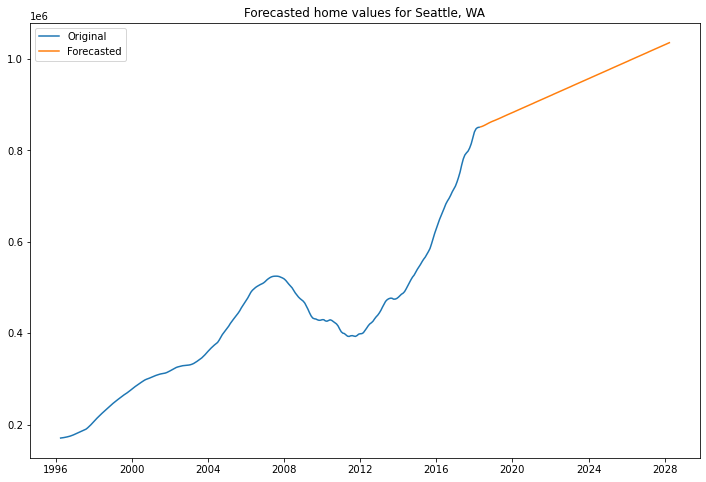

In [87]:
fig, ax = plt.subplots(figsize = (12,8)) 
ax.plot(melted_df['Seattle, WA'])
ax.plot(forecasted_df)
ax.legend(['Original', 'Forecasted'])
ax.set_title(f'Forecasted home values for Seattle, WA')